In [582]:
#DataAnalysis
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

#Model and Metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

#Scaling
from scipy.stats import zscore

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [153]:
first_df = pd.read_csv('concrete.csv')
df_columns = first_df.columns
Original_df = first_df[:]
first_df.head(n=50)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [85]:
first_df.groupby(by='age').count()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,strength
age,,,,,,,,
1,2,2,2,2,2,2,2,2
3,134,134,134,134,134,134,134,134
7,126,126,126,126,126,126,126,126
14,62,62,62,62,62,62,62,62
28,425,425,425,425,425,425,425,425
56,91,91,91,91,91,91,91,91
90,54,54,54,54,54,54,54,54
91,22,22,22,22,22,22,22,22
100,52,52,52,52,52,52,52,52


In [3]:
first_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# There are no NaN values in the dataset, and all columns have a known data in them. But we can see, when we did a head on our dataframe, we can see few columns have 0.0 as a value in certain columns

# Lets consider the 0.0 as a NaN value, and see how much zeros are there in each column

In [8]:
firstdf_copy = pd.read_csv('concrete.csv',na_values=0.0)

In [9]:
firstdf_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            559 non-null float64
ash             464 non-null float64
water           1030 non-null float64
superplastic    651 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# Almost half of certain columns like slag, ash and superplastic are zero. We need to know whether this zero is a real value in the cement mixture. For that we need to know from a domain expert, what are these ingredients in the cement, and which can be optional in a cement mixture

# Slag, flyash - Both of these are optional in a concrete mixture, but when mixed along with cement it proves to provide a good concrete strength, provided the quality of flyash and slag is good

# Superplastics - waste plastics are mixed with cement. But waste plastics needed a superplasticizer to mix it well with the cement. Superplastics added gives the cement mixture, good flexibility to mix well with the aggregates, if the cement mixture is too hard (less water, and water-cement ratio)

# Now we know, that these values are not to be considered as a NaN or a zero, and these are real values in the dataset

In [10]:
first_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


# Five Point Summary Analysis
There are some long tails observed in cement, slag, superplastic and age

Also observe the mean and the median of some of the columns like slag,ash and age. There is a very huge difference in the mean and median. Clearly these dont follow a normal distribution. Ash is worse with a median of 0, which means more than 50 percent of the data are filled with zero's. The huge difference in mean and median of these columns suggest that, there are some hidden clusters present in these dimensions. Lets view these visually when we draw a pairplot of these dimensions

Lets draw a boxplot to see the presence of outliers in each dimension

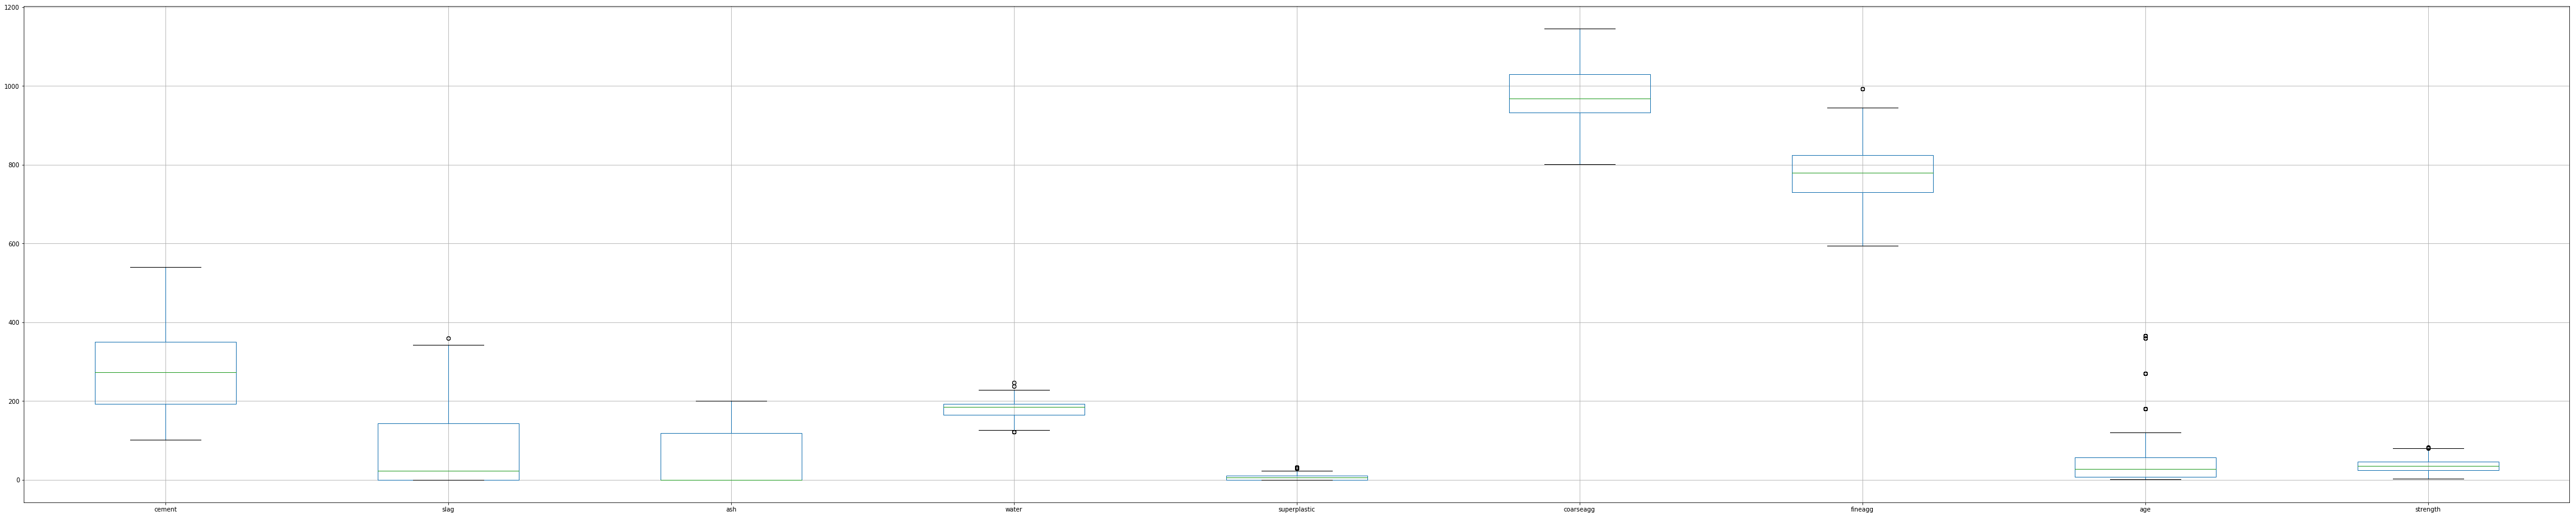

In [7]:
first_df.boxplot(figsize=(75,15))

# Boxplot Analysis
Clearly from boxplot, outliers are present in slag, water, superplastic, fineaggregate and age

Except for fineagg and age, all the outliers are very much close to the 75 percent quartile

Lets do a scatter plot on all the dimensions, to see the distribution of data in each dimension, and also to see the outliers range and their distribution

In [8]:
first_df.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


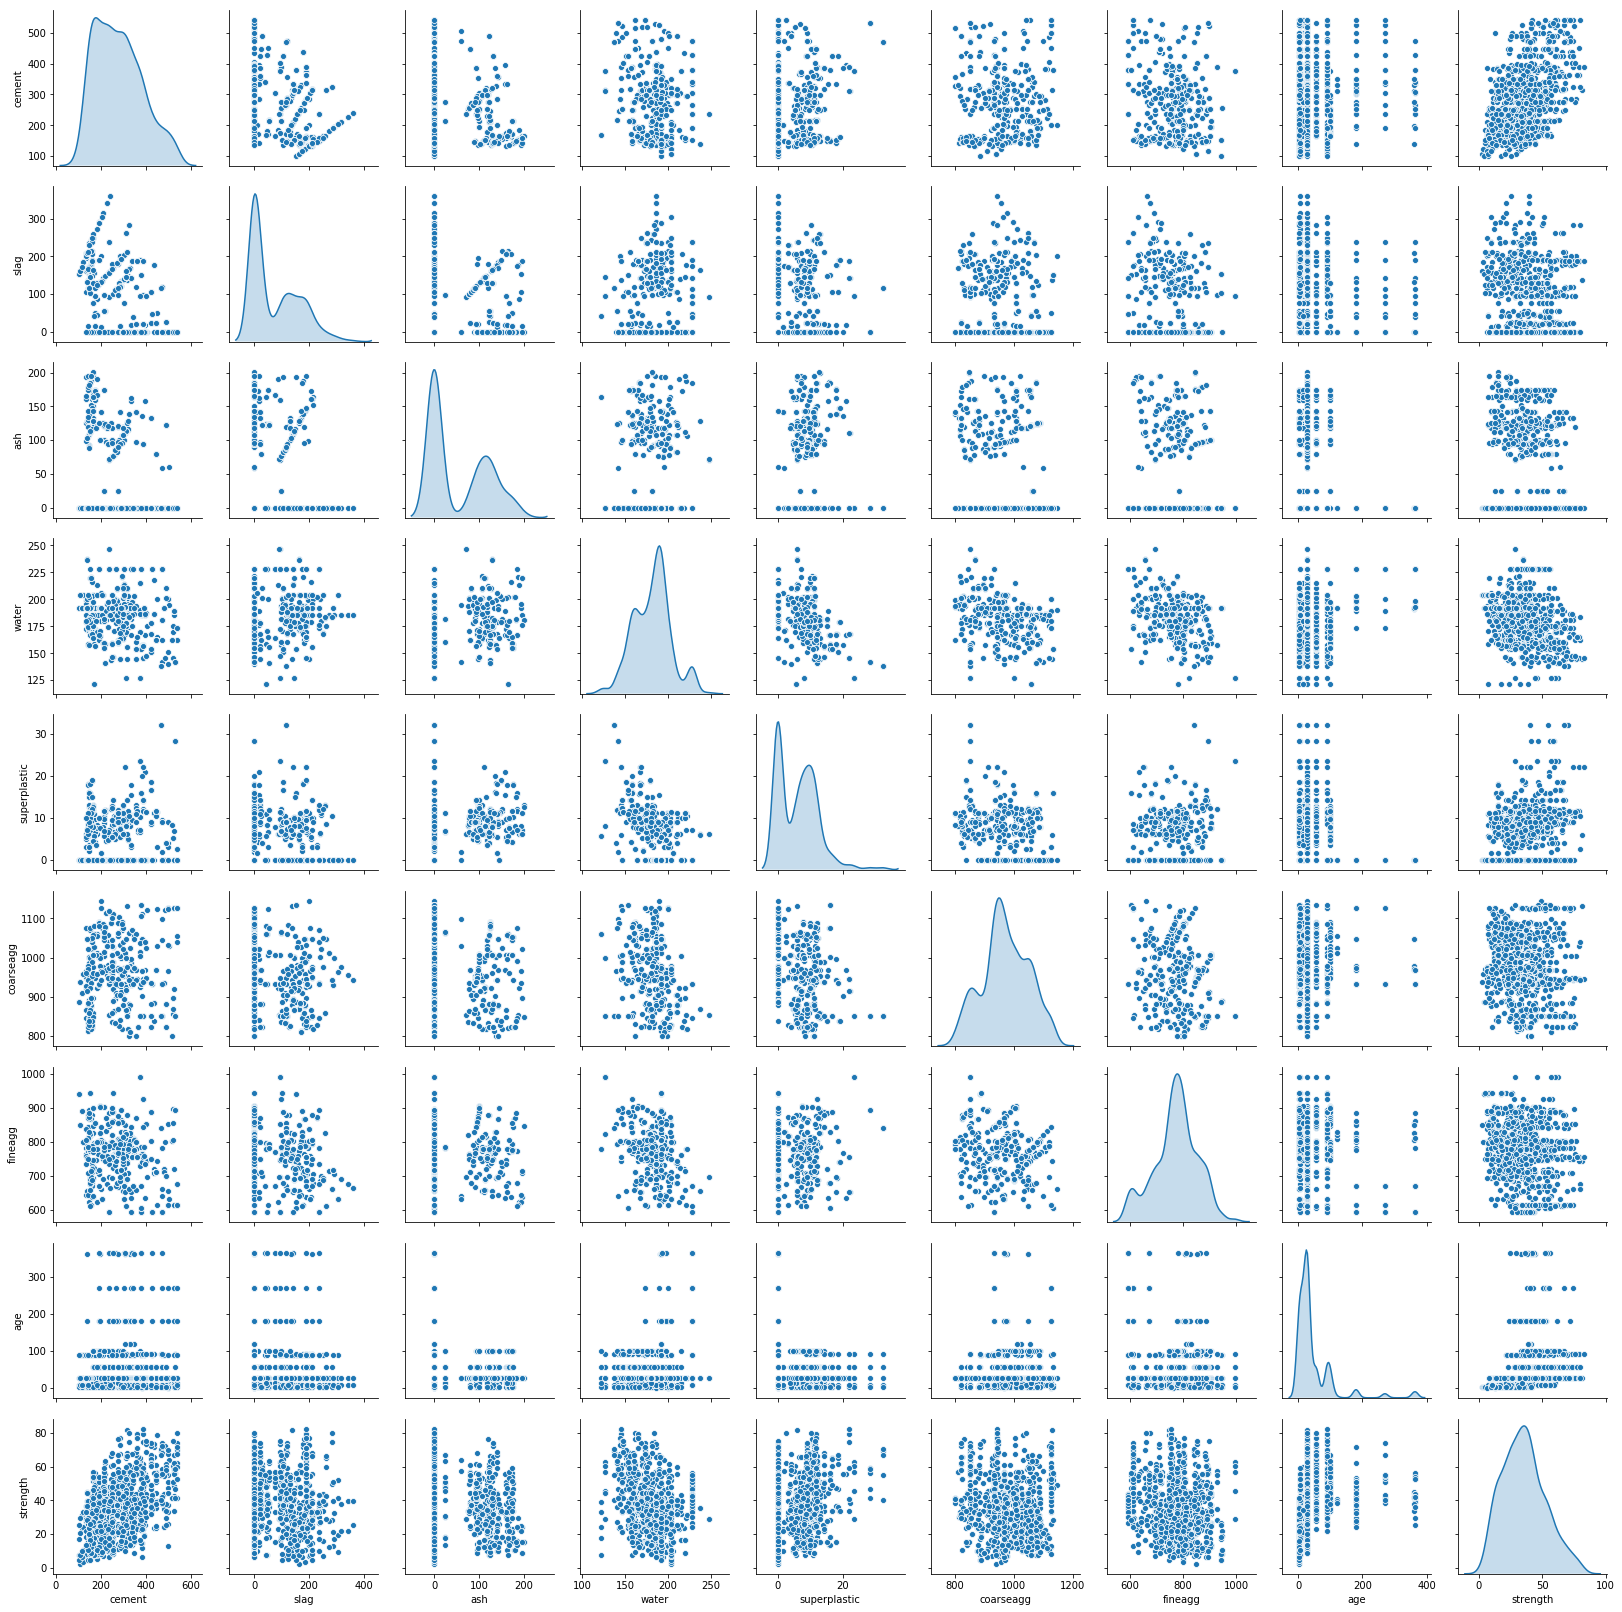

In [13]:
sns.pairplot(first_df,diag_kind='kde')

# Analysis from the pair plot of the initial dataframe

Clearly from the co-relation between the independent and dependent attributes, and also from the pairplot between these 
attributes, do not contribute much to the prediction of the dependent data. Also the pairplot between independent and all 
dependent variables show a cloud distribution

We cannot remove all the independent variables, but clearly these are also not strong predictors of the dependent variable
'strength'

The distribution between the independent variables are not linear, as we always desire to have

But looking at the diagonal columns, there are multiple peaks for each dimension. This gives an idea, that these data are not
from a single group of data, but from multiple classification in these data. Though there are several peaks in some of the dimensions, we will concentrate on the peaks in slag and ash, as the values in these columns for mean and median was very worse too. Lets try to find the hidden clusters within these dataset based upon slag and ash

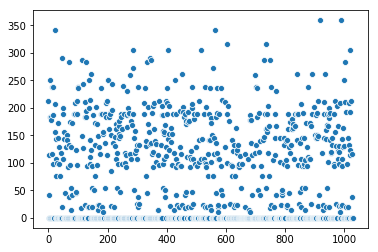

In [75]:
sns.scatterplot(data=first_df['slag'])

In [77]:
first_df[(first_df['slag']>357)][df_columns]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
918,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44
990,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42


# Observations on outliers in Slag

Max range outlier = (142.95-0)1.5 + 142.95 = 357, Min range outlier = 142.95 - (142.95-0)1.5 = -71

From the scatter plots, it can be seen the outliers are not very far away from the distribution of other points. Some points are near to the outliers as well

Lets inspect the outliers with the corresponding values in other columns. We cannot come to a conclusion on deciding whether this outlier is a valid outlier, because the corelation of this column 'slag' with other columns are poor

But here is another interesting fact from the comparison. When this value is an outlier, the two rows of data are exactly same. But just their age is different. We already decided to find hidden clusters from slag and ash. But age might provide some meaningful classification of these data points

Also for this particular two data points, the strength is purely dependent on age. As the age increases, the strength increases. This cannot be true, because with age, the strength will come down logically, so as per our initial observation, we may need to drop this column.

Lets see how much duplicate rows are present in our dataframe, after removing the age and strength column

In [40]:
duplicate_rows = first_df[first_df.duplicated(['cement','slag','ash','water','superplastic','coarseagg','fineagg'])]
duplicate_rows.sort_values(by=['cement'])

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
407,102.0,153.0,0.0,192.0,0.0,887.0,942.0,3,4.57
390,102.0,153.0,0.0,192.0,0.0,887.0,942.0,90,25.46
417,102.0,153.0,0.0,192.0,0.0,887.0,942.0,28,17.28
736,108.3,162.4,0.0,203.5,0.0,938.2,849.0,28,20.59
249,108.3,162.4,0.0,203.5,0.0,938.2,849.0,90,29.23
809,108.3,162.4,0.0,203.5,0.0,938.2,849.0,7,7.72
158,116.0,173.0,0.0,192.0,0.0,909.8,891.9,28,22.35
550,116.0,173.0,0.0,192.0,0.0,909.8,891.9,3,6.28
870,116.0,173.0,0.0,192.0,0.0,909.8,891.9,7,10.09
205,122.6,183.9,0.0,203.5,0.0,958.2,800.1,28,24.29


# Analysis of duplicate rows:

There are 603 rows of duplicate data out of the 1030 available data with us, when the age column is removed

Removing these rows will leave us with less number of data. 

1) We can remove these rows, build a model. 

2) We will also do a ridge and lasso regression on our initial dataframe and also on Polynomial Model, to reduce and remove the feauture importance and remove columns

Lets build the above two models and measure the model performances


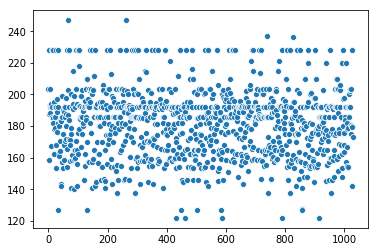

In [80]:
sns.scatterplot(data=first_df['water'])

In [6]:
first_df[(first_df['water']<125)][df_columns]


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
432,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
462,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
587,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
789,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
914,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82


In [231]:
first_df[(first_df['water']>245)][df_columns].sort_values(by='cement')


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
263,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
66,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63


# Observations on outliers in Water

Max range outlier = (192-164.9)1.5 + 164.9 = 205.55, MinRangeOutlier = 164.9 - (192-164.9)1.5 = 124.25

From the scatter plots, it can be seen the outliers are not very far away from the distribution of other points. Many points are near to the outliers as well

lets get extreme outliers from this distribution (192-164.9)3 + 164.9 = 246

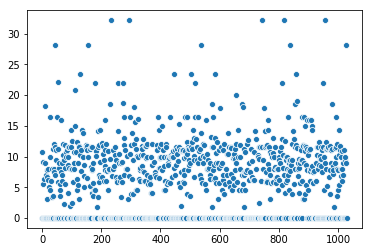

In [78]:
sns.scatterplot(data=first_df['superplastic'])

In [29]:
first_df[(first_df['superplastic']>25.5)][df_columns]


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
232,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
292,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
538,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
744,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
816,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
838,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
955,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3


# Observations on outliers in Superplastic

Max range outlier = (10.2-0)1.5 + 10.2 = 25.5

We know already superplastics are added as an additional ingredient, to increase the water-cement ratio

And as expected, water consumption is low. But the cement amount has increased very much. Lets inspect all the cement values greater than 500 and its corresponding superplastic value


In [11]:
first_df[(first_df['cement']>450)][df_columns]

# Most of the superplastic value is very less, when cement value is high. This is what we expect to see

# So we replace the superplastic  outliers with its mean value, as most of superplastics value are less when cement value is high

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
31,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29
44,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.20
57,480.0,0.0,0.0,192.0,0.0,936.2,712.2,7,34.57
75,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,14,36.94
86,500.0,0.0,0.0,140.0,4.0,966.0,853.0,28,67.57
95,475.0,0.0,59.0,142.0,1.9,1098.0,641.0,28,57.23
101,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
146,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,7,33.21
156,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.40
163,520.0,0.0,0.0,170.0,5.2,855.0,855.0,28,60.28


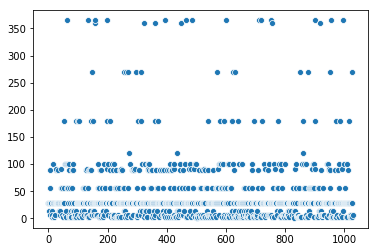

In [16]:
sns.scatterplot(data=first_df['age'])

In [ ]:
# Outliers in Age column

Max range outlier = (56-7)1.5 + 7 = 80.5

In [7]:
first_df[(first_df['age']>100)][df_columns]

#first_df[(first_df['age']>80.5)][df_columns]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
51,331.0,0.0,0.0,192.0,0.0,978.0,825.0,180,39.00
64,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
93,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
99,237.5,237.5,0.0,228.0,0.0,932.0,594.0,180,36.25
103,380.0,0.0,0.0,228.0,0.0,932.0,670.0,180,53.10
133,236.0,0.0,0.0,193.0,0.0,968.0,885.0,365,25.08
144,302.0,0.0,0.0,203.0,0.0,974.0,817.0,180,26.74
149,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270,41.15
152,322.0,0.0,0.0,203.0,0.0,974.0,800.0,180,29.59
157,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


# This dataset provided looks like a very small subset out of a very big superset

# Reason is most of the values in each column is repeated. 

# When age of building is greater than 100, superplastic, and ash values are only zero's. This provides us an important information, that the chance these datapoints are collected from different sources as per age of the construction

# If that is true, we need to find clusters within the dataset with age

# Our observation is that rows are duplicated, even data inside each column appear multiple times. These data does not appear to be collected well. We must remove the duplicate rows to build a better model which will survive

# Build a simple linear regression model with our initial data and analyze its performance

In [14]:
ini_X = first_df.iloc[:,0:8]
ini_y = first_df.iloc[:,8]

ini_Xtrain, iniXtest, ini_ytrain, ini_ytest = train_test_split(ini_X,ini_y,test_size=0.3,random_state=2)

In [15]:
init_linearReg = LinearRegression()
init_linearReg.fit(ini_Xtrain,ini_ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
ini_y_predict = init_linearReg.predict(iniXtest)
print(init_linearReg.coef_)

[ 0.11551267  0.10048509  0.08546232 -0.14003157  0.27959948  0.01856045
  0.01749032  0.10727165]


In [17]:
print("Training score for a simple linear regression model is {}".format(init_linearReg.score(ini_Xtrain,ini_ytrain)))

print("Testing score for a simple linear regression model is {}".format(init_linearReg.score(iniXtest,ini_ytest)))

Training score for a simple linear regression model is 0.5806768989409724
Testing score for a simple linear regression model is 0.6824824416609347


In [18]:
r2_score(ini_ytest,ini_y_predict)

0.6824824416609347

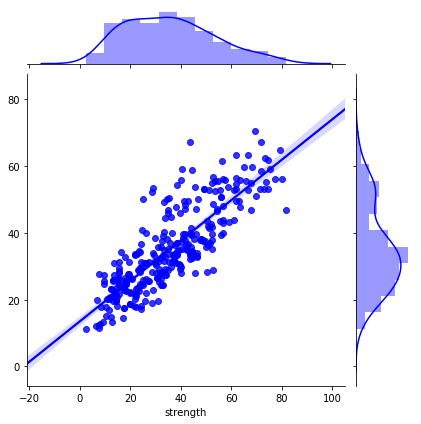

In [19]:
sns.jointplot(x=ini_ytest, y=ini_y_predict, kind="reg", color="b");

# Analysis from the simple linear regression:

Score is less at 68 percent, thus the model ability to predict the concrete strength is poor

Model is not overfit, as the coefficients are less. But the equation obtained from the linear regression, i.e the predicted values are much scattered away from our linear model

In [192]:
scaled_df_iter1 = first_df.apply(zscore)

scaled_ini_X = scaled_df_iter1.iloc[:,0:8]
scaled_ini_y = scaled_df_iter1.iloc[:,8]

scaled_ini_Xtrain, scaled_iniXtest, scaled_ini_ytrain, scaled_ini_ytest = train_test_split(scaled_ini_X,scaled_ini_y,test_size=0.3,random_state=2)

In [201]:
RandomForst_regr_iter1 = RandomForestRegressor(max_depth=7,max_features=3,random_state=0)
RandomForst_regr_iter1.fit(scaled_ini_Xtrain, scaled_ini_ytrain)
RandomForst_regr_iter1_predicted = RandomForst_regr_iter1.predict(scaled_iniXtest)

print("\nIteration -1 : Accuracy Score using Random Forest is {}".format(RandomForst_regr_iter1.score(scaled_ini_Xtrain,scaled_ini_ytrain)))

print("\nIteration -1 : Accuracy Score using Random Forest  is {}".format(RandomForst_regr_iter1.score(scaled_iniXtest,scaled_ini_ytest)))


Iteration -1 : Accuracy Score using Random Forest is 0.9258783642008315

Iteration -1 : Accuracy Score using Random Forest  is 0.8597222312258688


C:\Users\srith\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Function to remove outliers in the dataset

In [370]:
def removeOutliers(dataFrame):
    dataFrame['water'] = np.where(dataFrame["water"] >200, dataFrame['water'].quantile(0.75),dataFrame['water'])
    dataFrame['water'] = np.where(dataFrame["water"] <125, dataFrame['water'].quantile(0.25),dataFrame['water'])
    dataFrame = dataFrame.drop(dataFrame[(dataFrame['slag'] >357)].index)
    dataFrame['superplastic'] = np.where(dataFrame["superplastic"] >25, dataFrame['superplastic'].median(),dataFrame['superplastic'])
    #add multiple rows of code here to remove the outliers in dataset
    return dataFrame

Outliers_removed_df = pd.DataFrame(removeOutliers(first_df))
Outliers_removed_scaled_df = pd.DataFrame(removeOutliers(scaled_df_iter1))

# If a pipiline is constructed, pass this function name with the "Original_df", we have as a backup into the pipeline parameters

# Adding a ridge or lasso penalty factor to this model with very less co-efficient is useless.

# Lets build a polynomial model, to project these dimensions into higher space, and try extracting some more features from the existing features

# After projecting this into a higher dimension, lets try and  reduce/remove the feauture importance of these columns by adding a Ridge/Lasso penalty factor 

[ 0.11551267  0.10048509  0.08546232 -0.14003157  0.27959948  0.01856045
  0.01749032  0.10727165]
Iteration -2 : Accuracy Score using Linear Regression Model with Outliers removed is 0.6758755476588578
R2 score using Linear Regression Model with Outliers removed is 0.6834470833579867


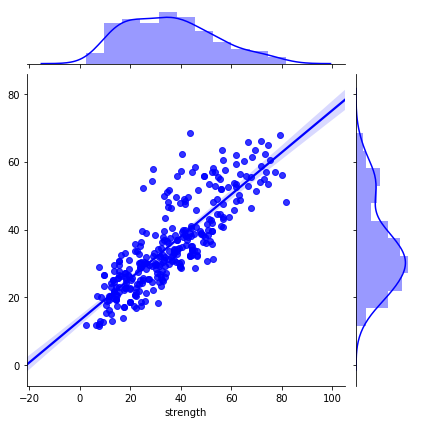

In [334]:
iter2_X = Outliers_removed_df.iloc[:,0:8]
iter2_y = Outliers_removed_df.iloc[:,8]

iter2_Xtrain, iter2_Xtest, iter2_ytrain, iter2_ytest = train_test_split(iter2_X,iter2_y,test_size=0.3,random_state=2)

iter2_linearReg = LinearRegression()
iter2_linearReg.fit(iter2_Xtrain,iter2_ytrain)


iter2_y_predict = iter2_linearReg.predict(iter2_Xtest)
print(init_linearReg.coef_)

print("Iteration -2 : Accuracy Score using Linear Regression Model with Outliers removed is {}".format(init_linearReg.score(iter2_Xtest,iter2_ytest)))

print("R2 score using Linear Regression Model with Outliers removed is {}".format(r2_score(iter2_ytest,iter2_y_predict)))

sns.jointplot(x=iter2_ytest, y=iter2_y_predict, kind="reg", color="b");

In [335]:
scaled_iter2_X = Outliers_removed_scaled_df.iloc[:,0:8]
scaled_iter2_y = Outliers_removed_scaled_df.iloc[:,8]

scaled_iter2_Xtrain, scaled_iter2Xtest, scaled_iter2_ytrain, scaled_iter2_ytest = train_test_split(scaled_iter2_X,scaled_iter2_y,test_size=0.3,random_state=2)

RandomForst_regr_iter2 = RandomForestRegressor(max_depth=7,max_features=3,random_state=0)
RandomForst_regr_iter2.fit(scaled_iter2_Xtrain, scaled_iter2_ytrain)
RandomForst_regr_iter2_predicted = RandomForst_regr_iter2.predict(scaled_iter2Xtest)

print("\nIteration -2 : Accuracy Score using Random Forest with Outliers removed is {}".format(RandomForst_regr_iter2.score(scaled_iter2_Xtrain,scaled_iter2_ytrain)))

print("\nIteration -2 : Accuracy Score using Random Forest with Outliers removed is {}".format(RandomForst_regr_iter2.score(scaled_iter2Xtest,scaled_iter2_ytest)))


Iteration -2 : Accuracy Score using Random Forest with Outliers removed is 0.9258783642008315

Iteration -2 : Accuracy Score using Random Forest with Outliers removed is 0.8597222312258688


C:\Users\srith\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Removing the outliers had no effect on the data set. A random forest regressor gives the best similar performance in both the cases

In [336]:
backup1_df = Original_df[:]
backup1_df = backup1_df.drop(columns='age')

scaled_backup1_df =Outliers_removed_scaled_df[:]
scaled_backup1_df = scaled_backup1_df.drop(columns='age')

In [337]:
#Remove the duplicates
backup1_df = backup1_df.drop_duplicates(subset=['cement','slag','ash','water','superplastic','coarseagg','fineagg'],keep='first')

scaled_backup1_df = scaled_backup1_df.drop_duplicates(subset=['cement','slag','ash','water','superplastic','coarseagg','fineagg'],keep='first')

In [338]:
X_thirdIter = backup1_df.iloc[:,0:7]
y_thirdIter = backup1_df.iloc[:,7]

X_thirdIter_scaled = scaled_backup1_df.iloc[:,0:7]
y_thirdIter_scaled = scaled_backup1_df.iloc[:,7]

thirdIter_Xtrain, thirdIter_Xtest, thirdIter_ytrain, thirdIter_ytest = train_test_split(X_thirdIter,y_thirdIter,test_size=0.30,random_state=2)

thirdIter_Xtrain_scaled, thirdIter_Xtest_scaled, thirdIter_ytrain_scaled, thirdIter_ytest_scaled = train_test_split(X_thirdIter_scaled,y_thirdIter_scaled,test_size=0.30,random_state=2)

thirdIter_linearReg = LinearRegression()
thirdIter_linearReg.fit(thirdIter_Xtrain,thirdIter_ytrain)
thirdIter_predict = thirdIter_linearReg.predict(thirdIter_Xtest)
print(thirdIter_linearReg.coef_)
print("Training score for this model after removing duplicates is {}".format(thirdIter_linearReg.score(thirdIter_Xtrain,thirdIter_ytrain)))
print("Testing score for  this linear regression model after removing duplicates is {}".format(thirdIter_linearReg.score(thirdIter_Xtest,thirdIter_ytest)))
print(r2_score(thirdIter_ytest,thirdIter_predict))

RandomForst_regr_iter3 = RandomForestRegressor(max_depth=6,max_features=3,random_state=0)
RandomForst_regr_iter3.fit(thirdIter_Xtrain_scaled, thirdIter_ytrain_scaled)
RandomForst_regr_iter3_predicted = RandomForst_regr_iter3.predict(thirdIter_Xtest_scaled)

print("\nIteration -3 : Accuracy Score using Random Forest with Duplicate rows and age column removed is {}".format(RandomForst_regr_iter3.score(thirdIter_Xtrain_scaled,thirdIter_ytrain_scaled)))

print("\nIteration -3 : Accuracy Score using Random Forest with Duplicate rows and age column removed is {}".format(RandomForst_regr_iter3.score(thirdIter_Xtest_scaled,thirdIter_ytest_scaled)))



[ 0.12523055  0.08887217  0.03671199 -0.27994911  0.23203874 -0.01784914
  0.01247002]
Training score for this model after removing duplicates is 0.6345084850260548
Testing score for  this linear regression model after removing duplicates is 0.4443230922759319
0.4443230922759319

Iteration -3 : Accuracy Score using Random Forest with Duplicate rows and age column removed is 0.8367858729586283

Iteration -3 : Accuracy Score using Random Forest with Duplicate rows and age column removed is 0.5423024172531064


C:\Users\srith\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [339]:
backup2_df = Original_df[:]

scaled_backup2_df =Outliers_removed_scaled_df[:]

In [340]:
backup2_df = backup2_df.drop_duplicates(subset=['cement','slag','ash','water','superplastic','coarseagg','fineagg'],keep='first')

scaled_backup2_df = scaled_backup2_df.drop_duplicates(subset=['cement','slag','ash','water','superplastic','coarseagg','fineagg'],keep='first')

In [341]:
X_fourthIter = backup2_df.iloc[:,0:8]
y_fourthIter = backup2_df.iloc[:,8]

X_fourthIter_scaled = scaled_backup2_df.iloc[:,0:8]
y_fourthIter_scaled = scaled_backup2_df.iloc[:,8]

fourthIter_Xtrain, fourthIter_Xtest, fourthIter_ytrain, fourthIter_ytest = train_test_split(X_fourthIter,y_fourthIter,test_size=0.30,random_state=2)

fourthIter_Xtrain_scaled, fourthIter_Xtest_scaled, fourthIter_ytrain_scaled, fourthIter_ytest_scaled = train_test_split(X_fourthIter_scaled,y_fourthIter_scaled,test_size=0.30,random_state=2)

fourthIter_linearReg = LinearRegression()
fourthIter_linearReg.fit(fourthIter_Xtrain,fourthIter_ytrain)
fourthIter_predict = fourthIter_linearReg.predict(fourthIter_Xtest)
print(fourthIter_linearReg.coef_)
print("Training score for this model after removing duplicate is {}".format(fourthIter_linearReg.score(fourthIter_Xtrain,fourthIter_ytrain)))
print("Testing score for  this linear regression model after removing duplicate is {}".format(fourthIter_linearReg.score(fourthIter_Xtest,fourthIter_ytest)))
print(r2_score(fourthIter_ytest,fourthIter_predict))

RandomForst_regr_iter4 = RandomForestRegressor(max_depth=8,max_features=3,random_state=0)
RandomForst_regr_iter4.fit(fourthIter_Xtrain_scaled, fourthIter_ytrain_scaled)
RandomForst_regr_iter4_predicted = RandomForst_regr_iter4.predict(fourthIter_Xtest_scaled)

print("\nIteration -4 : Accuracy Score using Random Forest with Duplicate rows removed is {}".format(RandomForst_regr_iter4.score(fourthIter_Xtrain_scaled,fourthIter_ytrain_scaled)))

print("\nIteration -4 : Accuracy Score using Random Forest with Duplicate rows removed is {}".format(RandomForst_regr_iter4.score(fourthIter_Xtest_scaled,fourthIter_ytest_scaled)))



[ 0.13615438  0.1071557   0.06319596 -0.21131194  0.3417562   0.00140112
  0.03045965  0.10842205]
Training score for this model after removing duplicate is 0.7131586960131999
Testing score for  this linear regression model after removing duplicate is 0.5432632849603845
0.5432632849603845

Iteration -4 : Accuracy Score using Random Forest with Duplicate rows removed is 0.9408682278045921

Iteration -4 : Accuracy Score using Random Forest with Duplicate rows removed is 0.777892062519903


C:\Users\srith\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Lets build a Polynomial Regression Model with the original dataframe


Lets build a polynomial model, to project these dimensions into higher space, and try extracting some more features from the existing features

After projecting this into a higher dimension, lets try and reduce/remove the feauture importance of these columns by adding a Ridge/Lasso penalty factor

In [34]:
# Lets scale the data first before feeding to Poly or Ridge/Lasso

second_df = Original_df[:]
X_second_df = second_df.iloc[:,0:8]
y_second_df = second_df.iloc[:,8]

def scaleData(dataframe):
    dataframe = dataframe.apply(zscore)
    return dataframe

scaled_dataframe = pd.DataFrame(scaleData(X_second_df))

In [35]:
poly1 = PolynomialFeatures(interaction_only=False)

# Lets leave the degree with the default value of 2. And we dont want to set the interaction_only as True, 
#as there is no column which is a strong predictor of the target variable

X_poly = poly1.fit_transform(ini_X)
X_train_Poly, X_test_Poly, y_train_Poly, y_test_Poly = train_test_split(X_poly, ini_y, test_size=0.30, random_state=1)
poly_regressor = LinearRegression()
poly_regressor.fit(X_train_Poly, y_train_Poly)

ypredict_poly1 = poly_regressor.predict(X_test_Poly)

print("\nAccuracy Score in Training for Polynomial Regression model is {}".format(poly_regressor.score(X_train_Poly,y_train_Poly)))

print("\nAccuracy Score in Testing for Polynomial Regression model is {}".format(poly_regressor.score(X_test_Poly,y_test_Poly)))


Accuracy Score in Training for Polynomial Regression model is 0.81281603287134

Accuracy Score in Testing for Polynomial Regression model is 0.7902302312168092


In [36]:
# That is a huge increase in performance when compared to the linear regression model we built. A 10 percent increase

print(poly_regressor.coef_)

[ 4.17858129e-10  2.22369857e+00  1.70499985e+00  1.31884249e+00
  1.19222191e+01  2.38826066e+01  2.14568866e+00  2.98625436e+00
  3.32479980e-01 -2.87425183e-04 -4.40232677e-04 -1.53730770e-04
 -4.06245630e-03 -1.00667163e-02 -5.08745972e-04 -7.90432238e-04
  1.35967815e-04 -2.29292489e-04  8.38793833e-05 -3.14419705e-03
 -7.92173519e-03 -4.26323343e-04 -5.60265931e-04  4.22876239e-04
  2.90481070e-04 -3.60312856e-03 -1.67842844e-02 -2.52934438e-04
 -3.65228332e-04  6.70805683e-04 -7.72845937e-03 -2.34108057e-02
 -4.08480084e-03 -4.61975697e-03 -4.50314411e-04 -3.82455363e-02
 -7.71479776e-03 -8.90381156e-03  2.75364356e-03 -3.12889663e-04
 -7.10243144e-04 -1.05967703e-04 -7.15369164e-04  1.13595342e-04
 -6.32542391e-04]


In [37]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train_Poly,y_train_Poly)

print("Training score using ridge penalty for a polynomial model is {}".format(ridge.score(X_train_Poly, y_train_Poly)))
print("Testing score using ridge penalty for a polynomial model is {}".format(ridge.score(X_test_Poly, y_test_Poly)))
print ("Ridge model:", (ridge.coef_))


Training score using ridge penalty for a polynomial model is 0.8125822226334417
Testing score using ridge penalty for a polynomial model is 0.7884871898521767
Ridge model: [ 0.00000000e+00  1.84014178e+00  1.28622071e+00  8.65004707e-01
  9.70264608e+00  1.57396338e+01  1.53568729e+00  2.38476769e+00
  3.11663111e-01 -2.44723843e-04 -3.44469109e-04 -5.01880474e-05
 -3.55609300e-03 -8.10704569e-03 -3.66616074e-04 -6.53727253e-04
  1.46901135e-04 -1.79720280e-04  1.90036180e-04 -2.58305161e-03
 -5.63674650e-03 -2.75867507e-04 -4.06705579e-04  4.33115575e-04
  3.62514568e-04 -2.96228081e-03 -1.39527182e-02 -9.73524521e-05
 -2.03187888e-04  6.79981517e-04 -6.33556994e-03 -1.22812267e-02
 -3.24440264e-03 -3.81679734e-03 -4.18856374e-04 -2.71003569e-02
 -4.75615598e-03 -5.96992897e-03  2.66599272e-03 -2.03442742e-04
 -4.90627084e-04 -1.04374323e-04 -6.06885989e-04  1.26153625e-04
 -6.33549614e-04]


In [38]:
lasso = Lasso(alpha=0.02)
lasso.fit(X_train_Poly,y_train_Poly)

print("Training score using lasso penalty factor for Polynomail model is {}".format(lasso.score(X_train_Poly, y_train_Poly)))
print("Testing score using lasso penalty factor for Polynomail model is {}".format(lasso.score(X_test_Poly, y_test_Poly)))
print ("Lasso model:", (lasso.coef_))


Training score using lasso penalty factor for Polynomail model is 0.8035780452821976
Testing score using lasso penalty factor for Polynomail model is 0.776505040646113
Lasso model: [ 0.00000000e+00  2.84008123e-01  4.68136171e-02 -1.90200039e-01
  4.39372666e-01  8.83683976e-01 -7.08753080e-02  1.90100787e-01
  1.57867682e-01 -7.09041680e-05 -1.22523543e-04  3.56982388e-05
 -6.94112937e-04 -2.52466331e-03  7.22451016e-05 -6.21545546e-05
  1.37971457e-04 -1.35013333e-04  2.51914531e-05  1.27212732e-04
  6.34803762e-04  3.03895825e-05  4.70181418e-05  3.97200896e-04
  1.44572242e-04  1.47843499e-05 -5.89756962e-03  9.69943587e-05
  1.73167684e-04  6.38797237e-04  8.77395475e-05  1.81938937e-03
 -3.12661830e-04 -1.64958490e-04  7.66448979e-05 -2.56677257e-02
  6.19418730e-04 -1.12916434e-04  3.96987311e-03 -2.97476673e-06
  1.46653216e-04 -5.27871471e-05 -1.82043557e-04  1.44927457e-04
 -6.46760247e-04]


C:\Users\srith\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# Ridge penalty factor applied on the polynomial model generated, provides a better result in predicting the target variable

# Polynomial model on the dataframe with outliers fine tuned

In [342]:
poly2 = PolynomialFeatures(interaction_only=False)

# Lets leave the degree with the default value of 2. And we dont want to set the interaction_only as True, 
#as there is no column which is a strong predictor of the target variable

X_poly2 = poly2.fit_transform(iter2_X)
X_train_Poly2, X_test_Poly2, y_train_Poly2, y_test_Poly2 = train_test_split(X_poly2, iter2_y, test_size=0.30, random_state=1)
poly_regressor2 = LinearRegression()
poly_regressor2.fit(X_train_Poly2, y_train_Poly2)

ypredict_poly2 = poly_regressor2.predict(X_test_Poly2)

print("\nAccuracy Score in Training for Polynomial Regression model with outliers finetuned is {}".format(poly_regressor2.score(X_train_Poly2,y_train_Poly2)))

print("\nAccuracy Score in Testing for Polynomial Regression model with outliers finetuned is {}".format(poly_regressor2.score(X_test_Poly2,y_test_Poly2)))


Accuracy Score in Training for Polynomial Regression model with outliers finetuned is 0.8148195525274717

Accuracy Score in Testing for Polynomial Regression model with outliers finetuned is 0.7831999995317808


In [343]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train_Poly2,y_train_Poly2)

print("Training score using ridge penalty for a polynomial model is {}".format(ridge.score(X_train_Poly2, y_train_Poly2)))
print("Testing score using ridge penalty for a polynomial model is {}".format(ridge.score(X_test_Poly2, y_test_Poly2)))

Training score using ridge penalty for a polynomial model is 0.814793278354176
Testing score using ridge penalty for a polynomial model is 0.7832678805977078


In [344]:
lasso = Lasso(alpha=0.2)
lasso.fit(X_train_Poly2,y_train_Poly2)

print("Training score using lasso penalty factor for Polynomail model is {}".format(lasso.score(X_train_Poly2, y_train_Poly2)))
print("Testing score using lasso penalty factor for Polynomail model is {}".format(lasso.score(X_test_Poly2, y_test_Poly2)))

Training score using lasso penalty factor for Polynomail model is 0.8073929089081553
Testing score using lasso penalty factor for Polynomail model is 0.7783768188097463


C:\Users\srith\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# Polynomial model on the dataframe with duplicates removed

In [345]:
poly3 = PolynomialFeatures(interaction_only=False)

X_poly3 = poly3.fit_transform(X_fourthIter)
X_train_Poly3, X_test_Poly3, y_train_Poly3, y_test_Poly3 = train_test_split(X_poly3, y_fourthIter, test_size=0.30, random_state=1)
poly_regressor3 = LinearRegression()
poly_regressor3.fit(X_train_Poly3, y_train_Poly3)

ypredict_poly3 = poly_regressor3.predict(X_test_Poly3)

print("\nAccuracy Score in Training for Polynomial Regression model with Duplicates Removed is {}".format(poly_regressor3.score(X_train_Poly3,y_train_Poly3)))

print("\nAccuracy Score in Testing for Polynomial Regression model with Duplicates Removed is {}".format(poly_regressor3.score(X_test_Poly3,y_test_Poly3)))


Accuracy Score in Training for Polynomial Regression model with Duplicates Removed is 0.8659118580953833

Accuracy Score in Testing for Polynomial Regression model with Duplicates Removed is 0.7238613120298589


In [346]:
ridge = Ridge(alpha=.2)
ridge.fit(X_train_Poly3,y_train_Poly3)

print("Training score using ridge penalty for a polynomial model with duplicates removed is {}".format(ridge.score(X_train_Poly3, y_train_Poly3)))
print("Testing score using ridge penalty for a polynomial model with duplicates removed is {}".format(ridge.score(X_test_Poly3, y_test_Poly3)))

Training score using ridge penalty for a polynomial model with duplicates removed is 0.8656794113474787
Testing score using ridge penalty for a polynomial model with duplicates removed is 0.7239538255951063


In [347]:
lasso = Lasso(alpha=0.2)
lasso.fit(X_train_Poly3,y_train_Poly3)

print("Training score using lasso penalty factor for Polynomail model with duplicates removed is {}".format(lasso.score(X_train_Poly3, y_train_Poly3)))
print("Testing score using lasso penalty factor for Polynomail model with duplicates removed is {}".format(lasso.score(X_test_Poly3, y_test_Poly3)))

Training score using lasso penalty factor for Polynomail model with duplicates removed is 0.8586854935334068
Testing score using lasso penalty factor for Polynomail model with duplicates removed is 0.7180306499964465


C:\Users\srith\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# Analysis of the models built so far:

There were many duplicates, and for each duplicate rows the age of the building was different. So for all those duplicate rows, the age will determine the strength of the concrete

That cannot be true and model built to predict the strength mostly based on age will be wrong in the production

So we removed the duplicates and kept the first instance of the duplicate along with the age column. This results in a poor performance with Random Forest with a score of 78, compared to the model score of 86 which had duplicate rows

For now, we will stick to this model and data, where we remove the duplicates

We need for more information like type of the building in which this concrete mixture is used. That might give more insights on why some of the values in certain columns are zero


# Lets use PCA techniques to find how much features are really needed to find the performance

[2.2823152  1.41745097 1.34138135 1.01514445 0.95243269 0.7909634
 0.17801452 0.03007197]


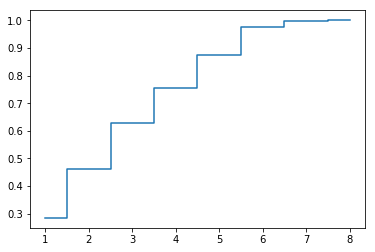

In [348]:
pca  = PCA(n_components=8)
pca.fit(scaled_dataframe)
print(pca.explained_variance_)

plt.step(list(range(1,9)),np.cumsum(pca.explained_variance_ratio_),where ='mid')

<BarContainer object of 8 artists>

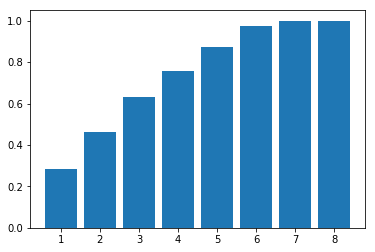

In [349]:
plt.bar(list(range(1,9)),np.cumsum(pca.explained_variance_ratio_),align ='center')

In [350]:
#Almost 95 percent of variance is explained by 6 feautures, the remaining two feautures are not needed

#Lets create a scaled dataframe with these 6 feautures and find its performance

pca = PCA(n_components=6)
pca.fit(scaled_dataframe)
New_PCA = pca.transform(scaled_dataframe)
New_PCA_df = pd.DataFrame(New_PCA)
New_PCA_df['Target'] = y_second_df
New_PCA_df.head(n=5)

,0,1,2,3,4,5,Target
0,1.618002,1.183167,-1.506561,-0.617667,-0.837767,0.097024,29.89
1,-1.796140,-0.943648,-1.139801,-0.824862,0.289017,0.542824,23.51
2,-0.756994,-0.521654,-0.443834,0.945533,-0.515931,-0.614225,29.22
3,2.536216,0.670491,-0.490418,-0.028372,0.147410,-1.163711,45.85
4,0.836137,0.746435,-1.051335,-1.482675,0.116318,0.685365,18.29


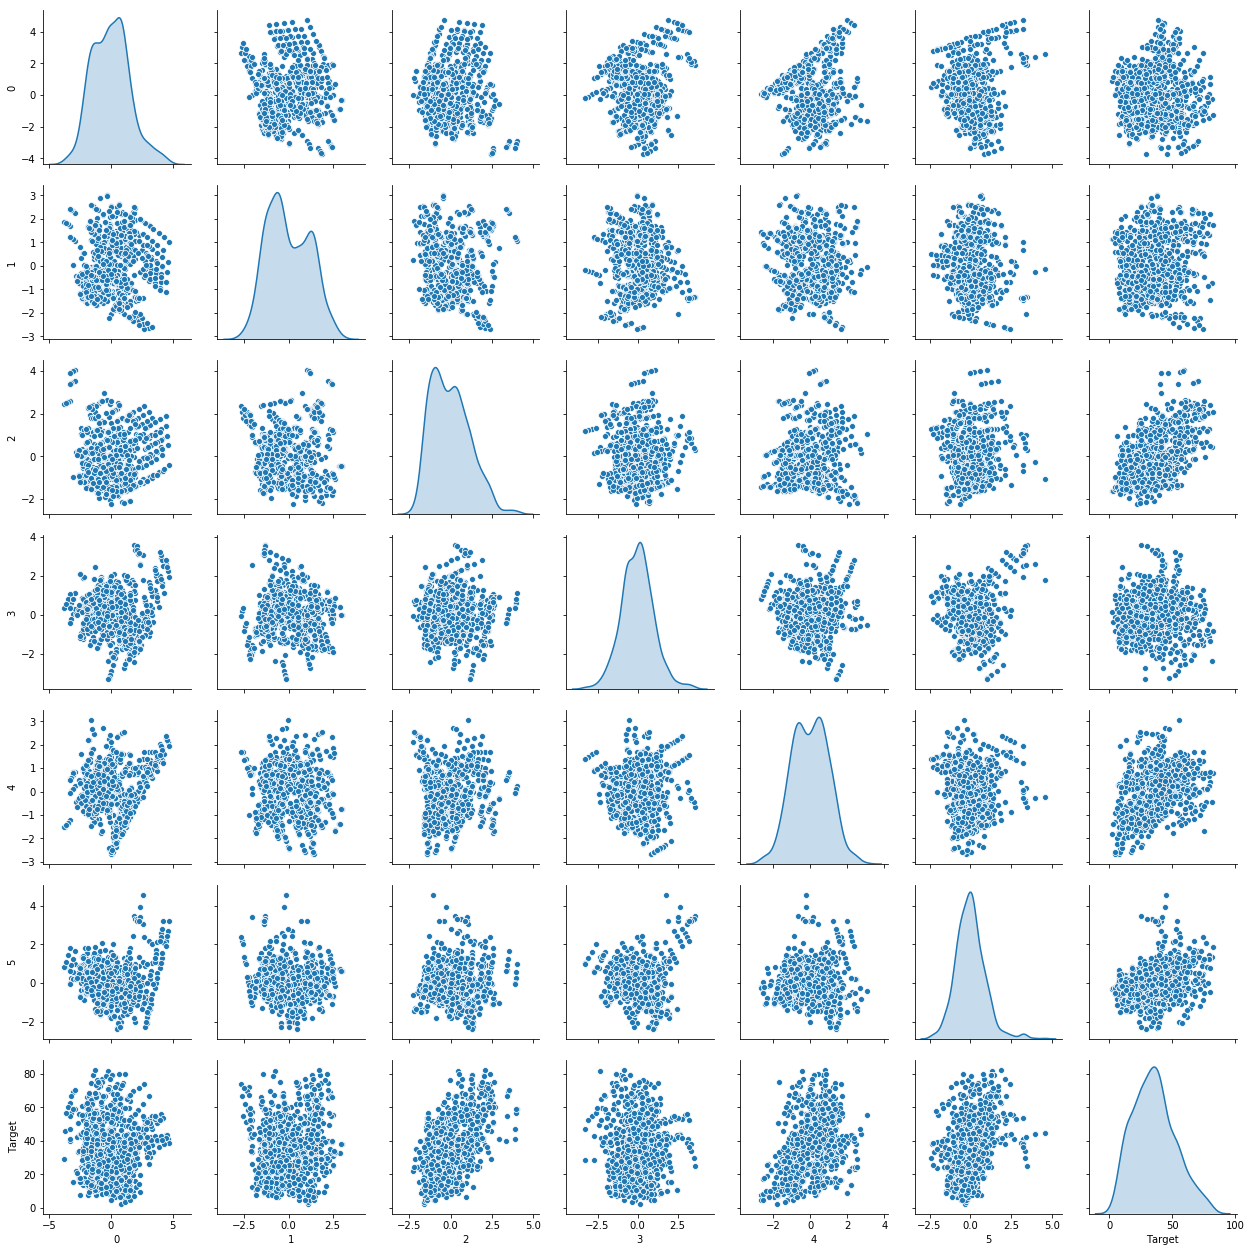

In [83]:
sns.pairplot(pd.DataFrame(New_PCA_df),diag_kind='kde')

# Now with this reduced feauture set, we can visibly see only there are two gaussians from which the data has been taken from

# Lets create a linear regression model with this reduced feautures and find its performance

# Then we will build a polynomial model with this reduced feautures set and measure its performance as well

In [351]:
X = New_PCA_df.iloc[:,0:6]
PCA_Xtrain, PCA_Xtest, PCA_ytrain, PCA_ytest = train_test_split(X,ini_y,test_size=0.3,random_state=2)

PCA_lr = LinearRegression()
PCA_lr.fit(PCA_Xtrain,PCA_ytrain)
PCA_Predicted = PCA_lr.predict(PCA_Xtest)
print("Accuracy Score is {}".format(PCA_lr.score(PCA_Xtest,PCA_ytest)))

Accuracy Score is 0.6313012104127993


In [352]:
PCA_Xtrain1, PCA_Xtest1, PCA_ytrain1, PCA_ytest1 = train_test_split(X,ini_y,test_size=0.3,random_state=2)

PCA_lr1 = RandomForestRegressor(max_features=3,max_depth=8,random_state=0)
PCA_lr1.fit(PCA_Xtrain1,PCA_ytrain1)
PCA_Predicted1 = PCA_lr1.predict(PCA_Xtest1)
print("Accuracy Score is using RandomForest with PCA on RawData is {}".format(PCA_lr1.score(PCA_Xtest1,PCA_ytest1)))

Accuracy Score is using RandomForest with PCA on RawData is 0.7513870935418271


C:\Users\srith\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [353]:
# PCA after removing duplicates

pca_noduplicates = PCA(n_components=6)
pca.fit(X_fourthIter_scaled)
New_PCA_noduplicates = pca.transform(X_fourthIter_scaled)
New_PCA_df_noDuplicates = pd.DataFrame(New_PCA_noduplicates)
New_PCA_df_noDuplicates['Target'] = y_fourthIter

X_noDuplicates = New_PCA_df_noDuplicates.iloc[:,0:6]

PCA_Xtrain2, PCA_Xtest2, PCA_ytrain2, PCA_ytest2 = train_test_split(X_noDuplicates,y_fourthIter,test_size=0.3,random_state=2)

PCA_rfR = RandomForestRegressor(max_features=2,max_depth=9,random_state=0)
PCA_rfR.fit(PCA_Xtrain2,PCA_ytrain2)
PCA_Predicted2 = PCA_rfR.predict(PCA_Xtest2)
print("Accuracy Score using Random Forest using PCA on data with no Duplicates is {}".format(PCA_rfR.score(PCA_Xtest2,PCA_ytest2)))

Accuracy Score using Random Forest using PCA on data with no Duplicates is 0.7237580298972205


C:\Users\srith\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [354]:
poly2 = PolynomialFeatures(interaction_only=False)

PCA_Xpoly = poly1.fit_transform(X)
X_train_Poly2, X_test_Poly2, y_train_Poly2, y_test_Poly2 = train_test_split(PCA_Xpoly, ini_y, test_size=0.30, random_state=1)
poly_regressor2 = LinearRegression()
poly_regressor2.fit(X_train_Poly2, y_train_Poly2)

ypredict_poly2 = poly_regressor2.predict(X_test_Poly2)

print("\nAccuracy Score in Training for Polynomial Regression model is {}".format(poly_regressor2.score(X_train_Poly2,y_train_Poly2)))

print("\nAccuracy Score in Testing for Polynomial Regression model is {}".format(poly_regressor2.score(X_test_Poly2,y_test_Poly2)))


Accuracy Score in Training for Polynomial Regression model is 0.7685182708389934

Accuracy Score in Testing for Polynomial Regression model is 0.7278620759910798


# Reducing dimensions does not result in better accuracy score. PCA is generally helpful for overfit data, or columns which provide same meaning in predicting the Target Variable. But there are no column which is a strong predictor of the target variable

# Lets try to extract new feautures on our own from the dataset


In [371]:
Combination_df = Original_df[:]

Combination_df = pd.DataFrame(removeOutliers(Combination_df))

In [372]:
Combination_df['water_cement_ratio'] = Combination_df['water']/(Combination_df['cement'])*1.0
Combination_df['water_cement_flyash_ratio'] = Combination_df['water']/(Combination_df['cement'] + Combination_df['slag'] + Combination_df['ash'] )*1.0

In [373]:
Combination_df.sort_values(by=['cement'],ascending=True)

# A water-cement ratio for a concrete is 0.5 to 0.7. If it is higher than this range, flyash, slag are mixed to cement, 
# to reduce it

# If the ratio is less than 0.5, the mixture is too think and it needs superplastics to make is less thick and for 
# making things easy to mix with aggregates

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water_cement_ratio,water_cement_flyash_ratio
417,102.0,153.0,0.0,192.0,0.0,887.0,942.0,28,17.28,1.882353,0.752941
183,102.0,153.0,0.0,192.0,0.0,887.0,942.0,7,7.68,1.882353,0.752941
390,102.0,153.0,0.0,192.0,0.0,887.0,942.0,90,25.46,1.882353,0.752941
407,102.0,153.0,0.0,192.0,0.0,887.0,942.0,3,4.57,1.882353,0.752941
809,108.3,162.4,0.0,192.0,0.0,938.2,849.0,7,7.72,1.772853,0.709272
249,108.3,162.4,0.0,192.0,0.0,938.2,849.0,90,29.23,1.772853,0.709272
736,108.3,162.4,0.0,192.0,0.0,938.2,849.0,28,20.59,1.772853,0.709272
230,108.3,162.4,0.0,192.0,0.0,938.2,849.0,3,2.33,1.772853,0.709272
81,116.0,173.0,0.0,192.0,0.0,909.8,891.9,90,31.02,1.655172,0.664360
550,116.0,173.0,0.0,192.0,0.0,909.8,891.9,3,6.28,1.655172,0.664360


In [374]:
Combination_df = Combination_df.drop(columns='water_cement_ratio')

# Lets build a randomforestregressor with this new dataframe

In [375]:
Combination_df_scaled = Combination_df.apply(zscore)

scaled_iter5_X = Combination_df_scaled.loc[:,['cement','slag','ash','water','superplastic','coarseagg','fineagg','age','water_cement_flyash_ratio']]
scaled_iter5_y = Combination_df_scaled.loc[:,'strength']

scaled_iter5_Xtrain, scaled_iter5Xtest, scaled_iter5_ytrain, scaled_iter5_ytest = train_test_split(scaled_iter5_X,scaled_iter5_y,test_size=0.3,random_state=2)

RandomForst_regr_iter5 = RandomForestRegressor(max_depth=10,max_features=4,random_state=0)
RandomForst_regr_iter5.fit(scaled_iter5_Xtrain, scaled_iter5_ytrain)
RandomForst_regr_iter5_predicted = RandomForst_regr_iter5.predict(scaled_iter5Xtest)

print("\nIteration -5 : Accuracy Score using Random Forest with newly created feautures is {}".format(RandomForst_regr_iter5.score(scaled_iter5_Xtrain,scaled_iter5_ytrain)))

print("\nIteration -5 : Accuracy Score using Random Forest with newly created feautures is {}".format(RandomForst_regr_iter5.score(scaled_iter5Xtest,scaled_iter5_ytest)))


Iteration -5 : Accuracy Score using Random Forest with newly created feautures is 0.9696845264040829

Iteration -5 : Accuracy Score using Random Forest with newly created feautures is 0.9048570784065995


C:\Users\srith\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [376]:
Combination_df_scaled_noDuplicates = Combination_df_scaled.drop_duplicates(subset=['cement','slag','ash','water','superplastic','coarseagg','fineagg'],keep='first')

scaled_iter6_X = Combination_df_scaled_noDuplicates.loc[:,['cement','slag','ash','water','superplastic','coarseagg','fineagg','age','water_cement_flyash_ratio']]
scaled_iter6_y = Combination_df_scaled_noDuplicates.loc[:,'strength']

scaled_iter6_Xtrain, scaled_iter6Xtest, scaled_iter6_ytrain, scaled_iter6_ytest = train_test_split(scaled_iter6_X,scaled_iter6_y,test_size=0.3,random_state=2)

RandomForst_regr_iter6 = RandomForestRegressor(max_depth=9,max_features=3,random_state=0)
RandomForst_regr_iter6.fit(scaled_iter6_Xtrain, scaled_iter6_ytrain)
RandomForst_regr_iter6_predicted = RandomForst_regr_iter6.predict(scaled_iter6Xtest)

print("\nIteration -6 : Accuracy Score using Random Forest with newly created feautures having No duplicates is {}".format(RandomForst_regr_iter6.score(scaled_iter6_Xtrain,scaled_iter6_ytrain)))

print("\nIteration -6 : Accuracy Score using Random Forest with newly created feautures having No duplicates is {}".format(RandomForst_regr_iter6.score(scaled_iter6Xtest,scaled_iter6_ytest)))


Iteration -6 : Accuracy Score using Random Forest with newly created feautures having No duplicates is 0.9583085780954524

Iteration -6 : Accuracy Score using Random Forest with newly created feautures having No duplicates is 0.7760446822805147


C:\Users\srith\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


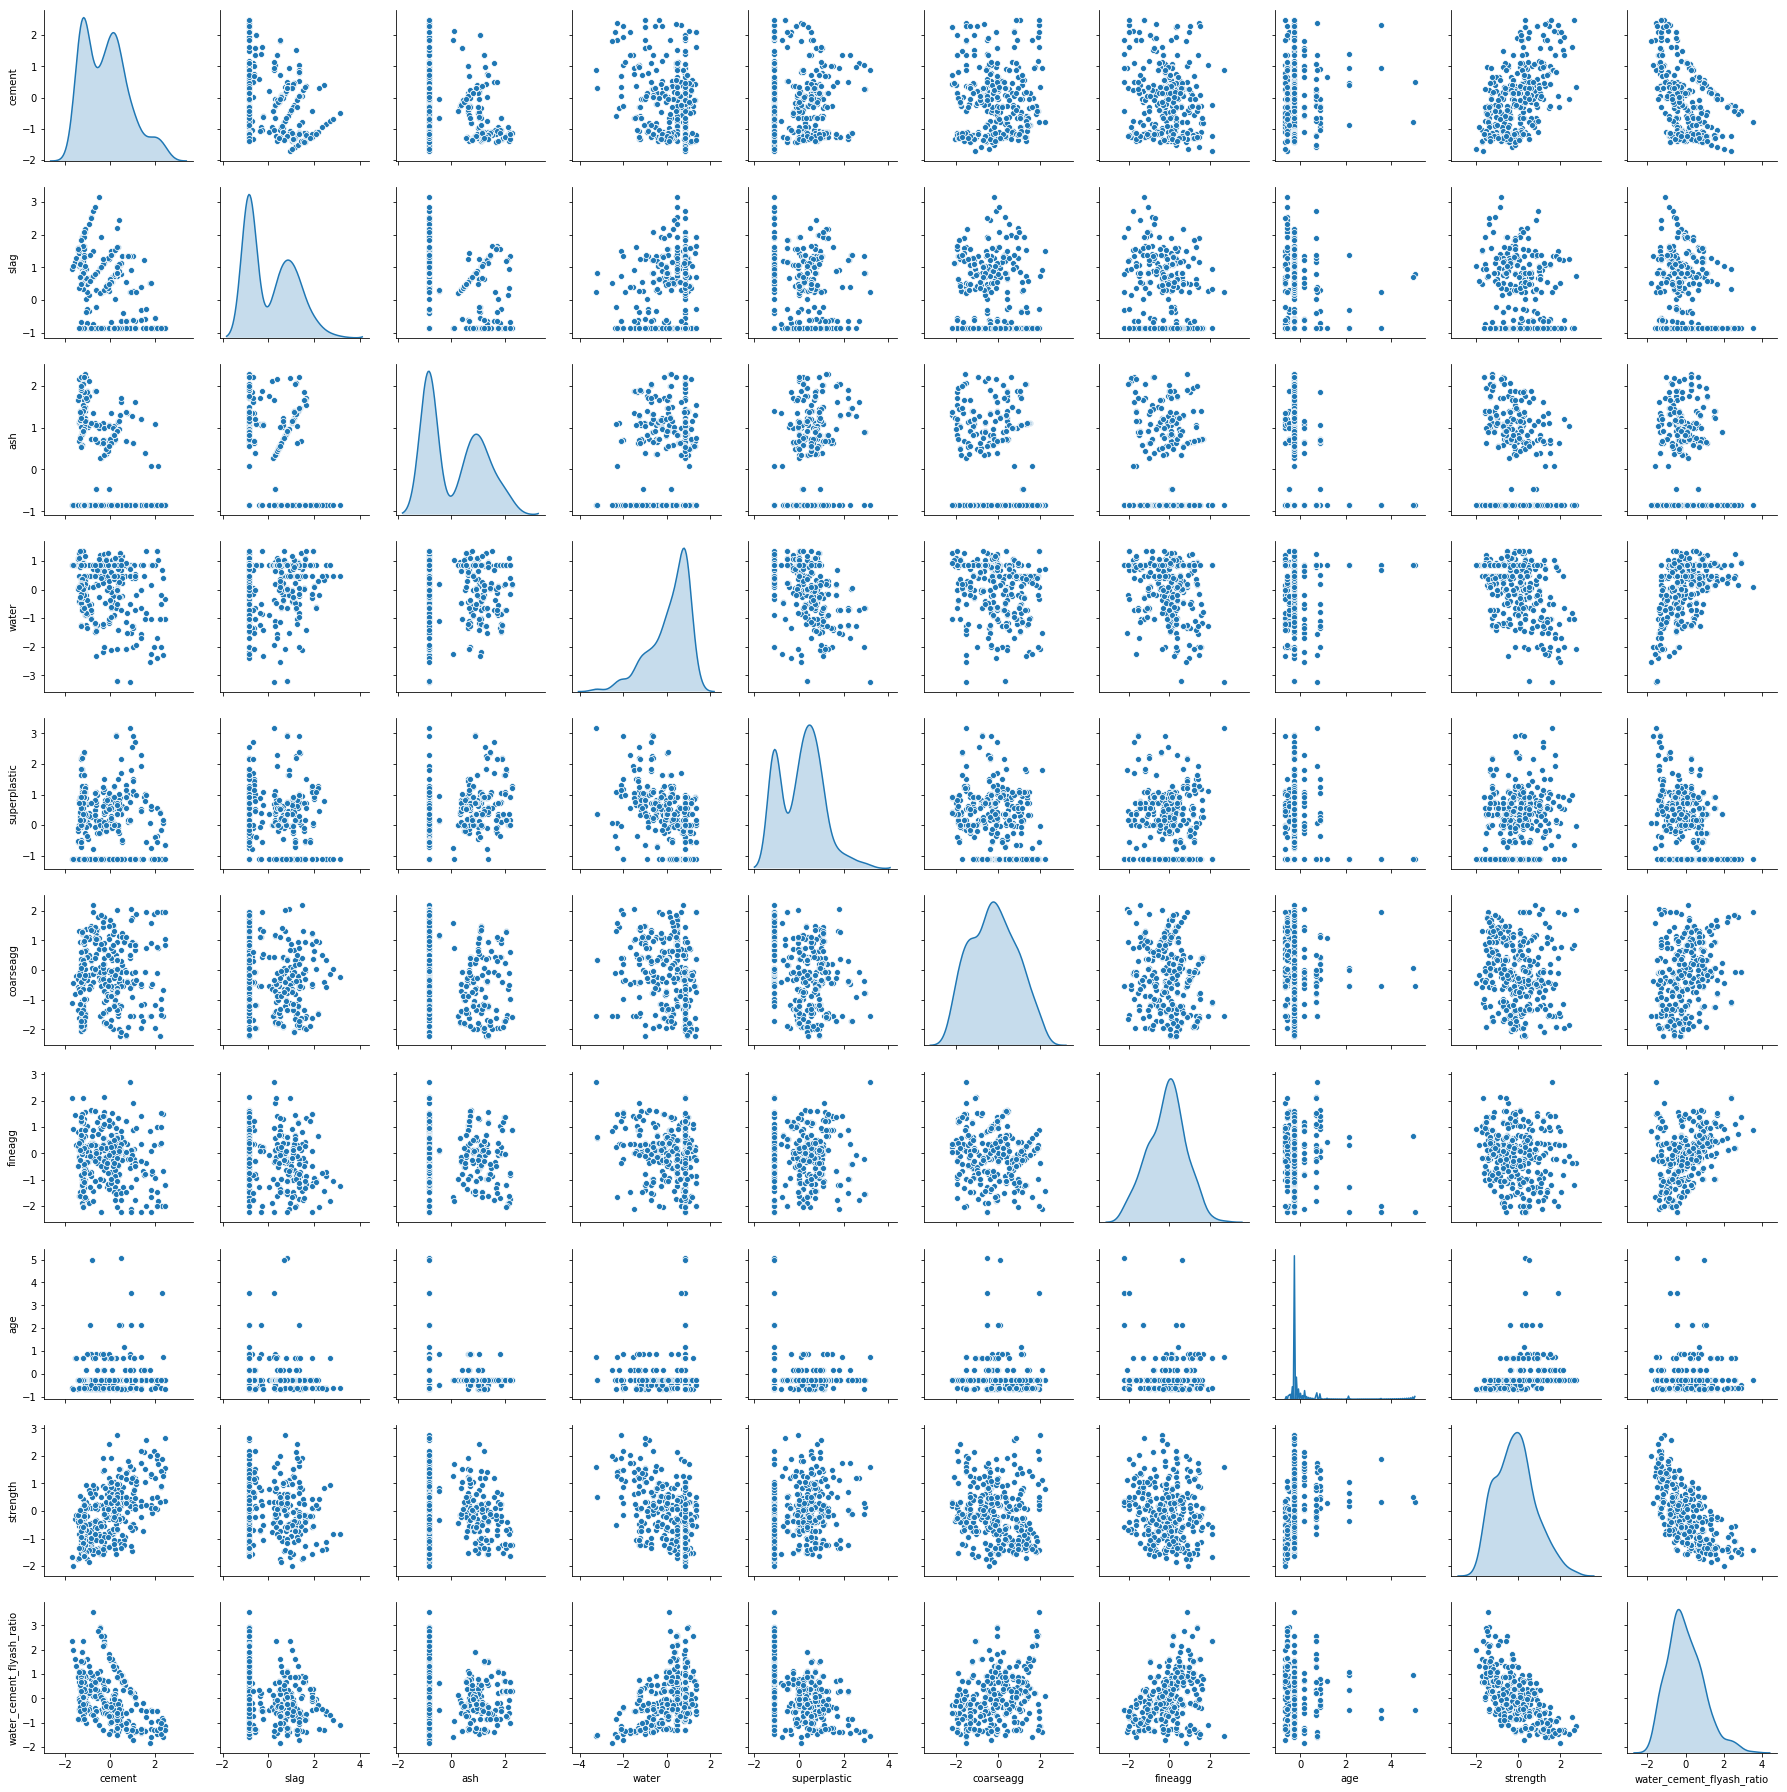

In [377]:
sns.pairplot(Combination_df_scaled_noDuplicates,diag_kind='kde')

# The new column, has definitely improved the performance of model with raw data from 86 to 90 percent

# And when the duplicates are removed, the performance has not improved

# Now Lets try to build a model for the different gaussians of the data available with us

# From the pairplot, above, there are two peaks observable in slag, ash and superplastic

# lets group the data with these clusters and build separate model for each clusters using RandomForest

In [393]:
Combination_df_scaled_backUp = Combination_df_scaled[:]

clusters = KMeans(n_clusters=2, n_init = 10,random_state=1)
clusters.fit(Combination_df_scaled)
Predicted_Gaussians=clusters.predict(Combination_df_scaled)
Combination_df_scaled["GROUP"] = Predicted_Gaussians 

In [394]:
Combination_df_scaled_noDuplicates_backUp = Combination_df_scaled_noDuplicates[:]

clusters = KMeans(n_clusters=2, n_init = 10,random_state=1)
clusters.fit(Combination_df_scaled_noDuplicates)
Predicted_Gaussians=clusters.predict(Combination_df_scaled_noDuplicates)
Combination_df_scaled_noDuplicates['GROUP'] = Predicted_Gaussians 

C:\Users\srith\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000205922E0080>,
      dtype=object)

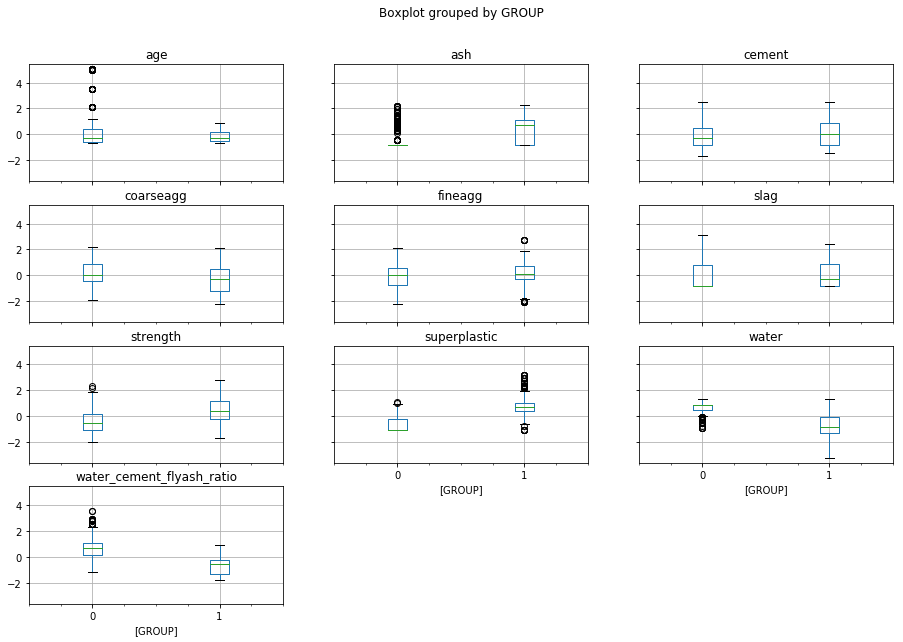

In [395]:
import matplotlib.pylab as plt

Combination_df_scaled.boxplot(by = 'GROUP',  figsize=(15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020593B248D0>,
      dtype=object)

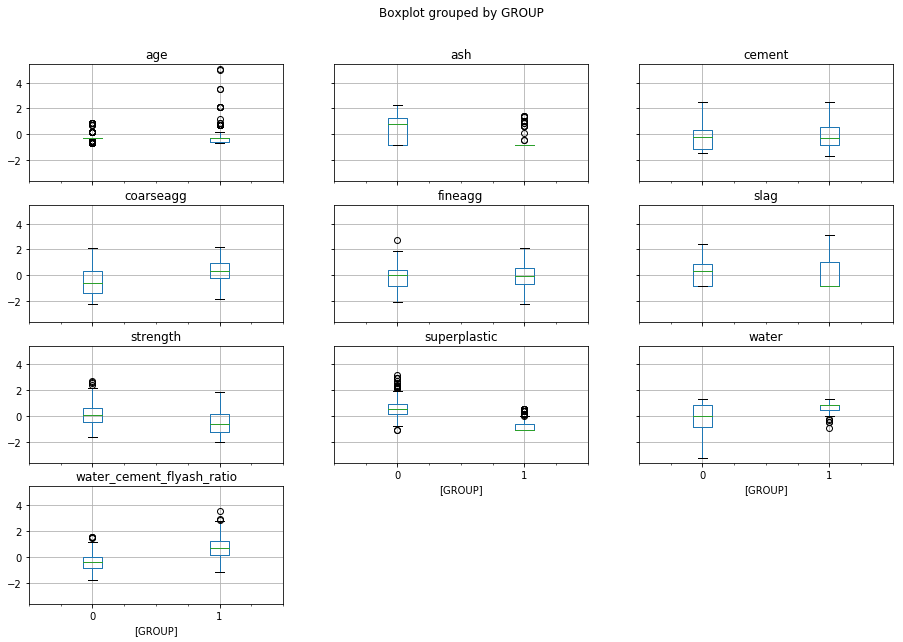

In [396]:
import matplotlib.pylab as plt

Combination_df_scaled_noDuplicates.boxplot(by = 'GROUP',  figsize=(15, 10))

In [397]:
# Addressing outliers at group level

data = Combination_df_scaled   
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected1 = (data.groupby('GROUP').transform(replace)) 
concat_data1 = data_corrected.join(pd.DataFrame(Combination_df_scaled['GROUP']))

C:\Users\srith\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [398]:
# Addressing outliers at group level

data = Combination_df_scaled_noDuplicates   
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected2 = (data.groupby('GROUP').transform(replace)) 
concat_data2 = data_corrected2.join(pd.DataFrame(Combination_df_scaled_noDuplicates['GROUP']))

C:\Users\srith\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020593B59898>,
      dtype=object)

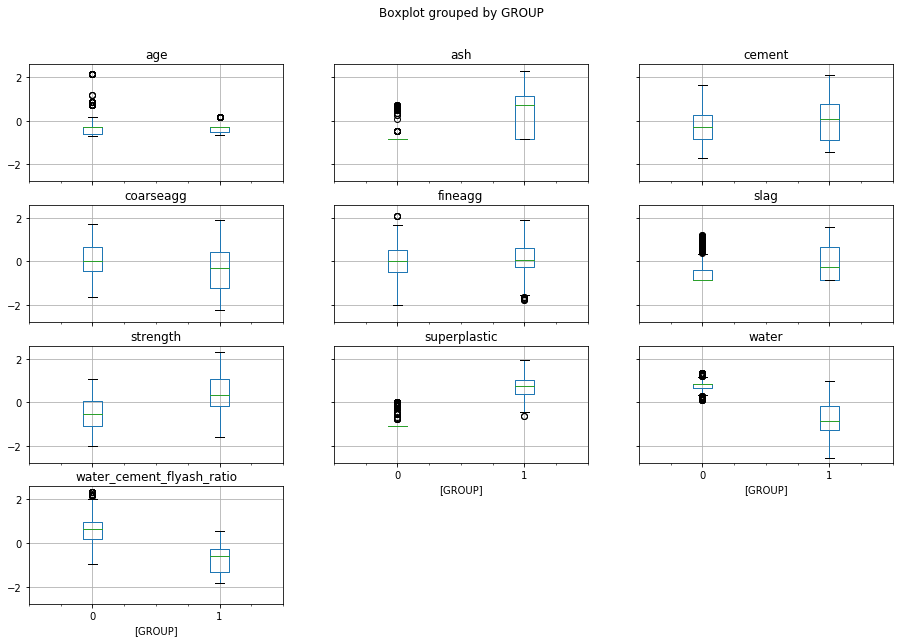

In [399]:
concat_data1.boxplot(by = 'GROUP',  figsize=(15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020594BD4BA8>,
      dtype=object)

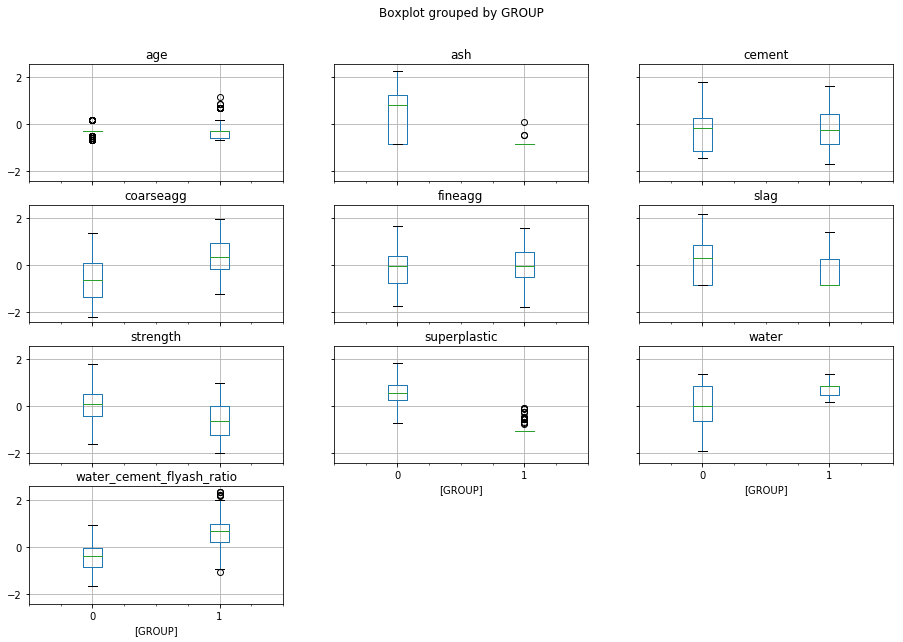

In [400]:
concat_data2.boxplot(by = 'GROUP',  figsize=(15, 10))

In [401]:
# Let us break the data into new and old constructions

OldBuilding = concat_data1[concat_data1['GROUP']==1]
NewBuilding = concat_data1[concat_data1['GROUP']==0]

In [407]:
OldBuilding_X = OldBuilding.loc[:,['cement','slag','ash','water','superplastic','coarseagg','fineagg','age','water_cement_flyash_ratio']]
OldBuilding_y = OldBuilding.loc[:,'strength']

OldBuilding_Xtrain, OldBuildingXtest, OldBuilding_ytrain, OldBuilding_ytest = train_test_split(OldBuilding_X,OldBuilding_y,test_size=0.3,random_state=2)

RandomForst_regr_OldBuilding = RandomForestRegressor(max_depth=10,max_features=4,random_state=0)
RandomForst_regr_OldBuilding.fit(OldBuilding_Xtrain, OldBuilding_ytrain)
RandomForst_regr_OldBuilding_predicted = RandomForst_regr_OldBuilding.predict(OldBuildingXtest)

print("\n : Accuracy Score using Random Forest for Old Building is {}".format(RandomForst_regr_OldBuilding.score(OldBuilding_Xtrain,OldBuilding_ytrain)))

print("\n : Accuracy Score using Random Forest with Old Building is {}".format(RandomForst_regr_OldBuilding.score(OldBuildingXtest,OldBuilding_ytest)))


 : Accuracy Score using Random Forest for Old Building is 0.8978250067675836

 : Accuracy Score using Random Forest with Old Building is 0.7101338794233308


C:\Users\srith\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [408]:
NewBuilding_X = NewBuilding.loc[:,['cement','slag','ash','water','superplastic','coarseagg','fineagg','age','water_cement_flyash_ratio']]
NewBuilding_y = NewBuilding.loc[:,'strength']

NewBuilding_Xtrain, NewBuildingXtest, NewBuilding_ytrain, NewBuilding_ytest = train_test_split(NewBuilding_X,NewBuilding_y,test_size=0.3,random_state=2)

RandomForst_regr_NewBuilding = RandomForestRegressor(max_depth=10,max_features=4,random_state=0)
RandomForst_regr_NewBuilding.fit(NewBuilding_Xtrain, NewBuilding_ytrain)
RandomForst_regr_NewBuilding_predicted = RandomForst_regr_NewBuilding.predict(NewBuildingXtest)

print("\n : Accuracy Score using Random Forest for New Building is {}".format(RandomForst_regr_NewBuilding.score(NewBuilding_Xtrain,NewBuilding_ytrain)))

print("\n : Accuracy Score using Random Forest with New Building is {}".format(RandomForst_regr_NewBuilding.score(NewBuildingXtest,NewBuilding_ytest)))


 : Accuracy Score using Random Forest for New Building is 0.9287881195942931

 : Accuracy Score using Random Forest with New Building is 0.7931913716904018


C:\Users\srith\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [410]:
# Let us break the data into new and old constructions which have no duplicates

OldBuilding_2 = concat_data2[concat_data2['GROUP']==1]
NewBuilding_2 = concat_data2[concat_data2['GROUP']==0]

In [419]:
OldBuilding_2_X = OldBuilding_2.loc[:,['cement','slag','ash','water','superplastic','coarseagg','fineagg','age','water_cement_flyash_ratio']]
OldBuilding_2_y = OldBuilding_2.loc[:,'strength']

OldBuilding_2_Xtrain, OldBuilding_2Xtest, OldBuilding_2_ytrain, OldBuilding_2_ytest = train_test_split(OldBuilding_2_X,OldBuilding_2_y,test_size=0.3,random_state=2)

RandomForst_regr_OldBuilding2 = RandomForestRegressor(max_depth=10,max_features=3,random_state=0)
RandomForst_regr_OldBuilding2.fit(OldBuilding_2_Xtrain, OldBuilding_2_ytrain)
RandomForst_regr_OldBuilding2_predicted = RandomForst_regr_OldBuilding2.predict(OldBuilding_2Xtest)

print("\n : Accuracy Score using Random Forest for Old Building after removing duplicates is {}".format(RandomForst_regr_OldBuilding2.score(OldBuilding_2_Xtrain,OldBuilding_2_ytrain)))

print("\n : Accuracy Score using Random Forest with Old Building after removing duplicates is {}".format(RandomForst_regr_OldBuilding2.score(OldBuilding_2Xtest,OldBuilding_2_ytest)))


 : Accuracy Score using Random Forest for Old Building after removing duplicates is 0.9338600622590318

 : Accuracy Score using Random Forest with Old Building after removing duplicates is 0.6387991978673433


C:\Users\srith\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Not a satisfactory performance on building models for each gaussian. But it cannot be said there are no hidden clusters. Hidden clusters are definitely present, but we have very less number of data for each cluster

# Even for identifying two clusters, we have this data "0" in certain clusters. Similarly if we go for a cluster greater than two, we are left with very little data, which will only hinder the performance, given the number of 0 in slag, ash and superplastic


# Lets try to mix cement, slag, ash and superplastic into one column, and then try to cluster the analysis, and there would be no need to remove the duplicates

In [457]:
ClusterAnalysis_Combined_df = Combination_df

In [458]:
ClusterAnalysis_Combined_df['Cement_Mixture'] = ClusterAnalysis_Combined_df['cement'] + ClusterAnalysis_Combined_df['slag'] + ClusterAnalysis_Combined_df['ash'] + ClusterAnalysis_Combined_df['superplastic']
ClusterAnalysis_Combined_df['water_cement_flyash_ratio'] = ClusterAnalysis_Combined_df['water'] / (ClusterAnalysis_Combined_df['cement'] + ClusterAnalysis_Combined_df['slag'] + ClusterAnalysis_Combined_df['ash'] + ClusterAnalysis_Combined_df['superplastic'])

In [459]:
ClusterAnalysis_Combined_df.drop(columns=['cement','slag','ash','superplastic'])
ClusterAnalysis_Combined_df = ClusterAnalysis_Combined_df[['Cement_Mixture','water','water_cement_flyash_ratio','coarseagg','fineagg','age','strength']]
ClusterAnalysis_Combined_df.head(n=5)

,Cement_Mixture,water,water_cement_flyash_ratio,coarseagg,fineagg,age,strength
0,353.3,192.0,0.543447,971.8,748.5,28,29.89
1,346.2,158.3,0.457250,1080.8,796.2,14,23.51
2,351.2,187.4,0.533599,956.9,861.2,28,29.22
3,380.0,192.0,0.505263,932.0,670.0,28,45.85
4,347.3,193.3,0.556579,1047.4,696.7,28,18.29


In [460]:
ClusterAnalysis_Combined_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement_Mixture,1028.0,414.868093,94.701078,200.000000,343.100000,398.050000,491.125000,643.9
water,1028.0,178.293774,16.018632,126.600000,164.900000,185.000000,192.000000,200.0
water_cement_flyash_ratio,1028.0,0.455968,0.124872,0.232535,0.375639,0.438314,0.543447,0.9
coarseagg,1028.0,972.979864,77.817331,801.000000,932.000000,968.000000,1029.400000,1145.0
fineagg,1028.0,773.793093,80.108704,594.000000,732.900000,779.850000,824.250000,992.6
age,1028.0,45.716926,63.217455,1.000000,7.000000,28.000000,56.000000,365.0
strength,1028.0,35.824553,16.718469,2.330000,23.697500,34.445000,46.207500,82.6


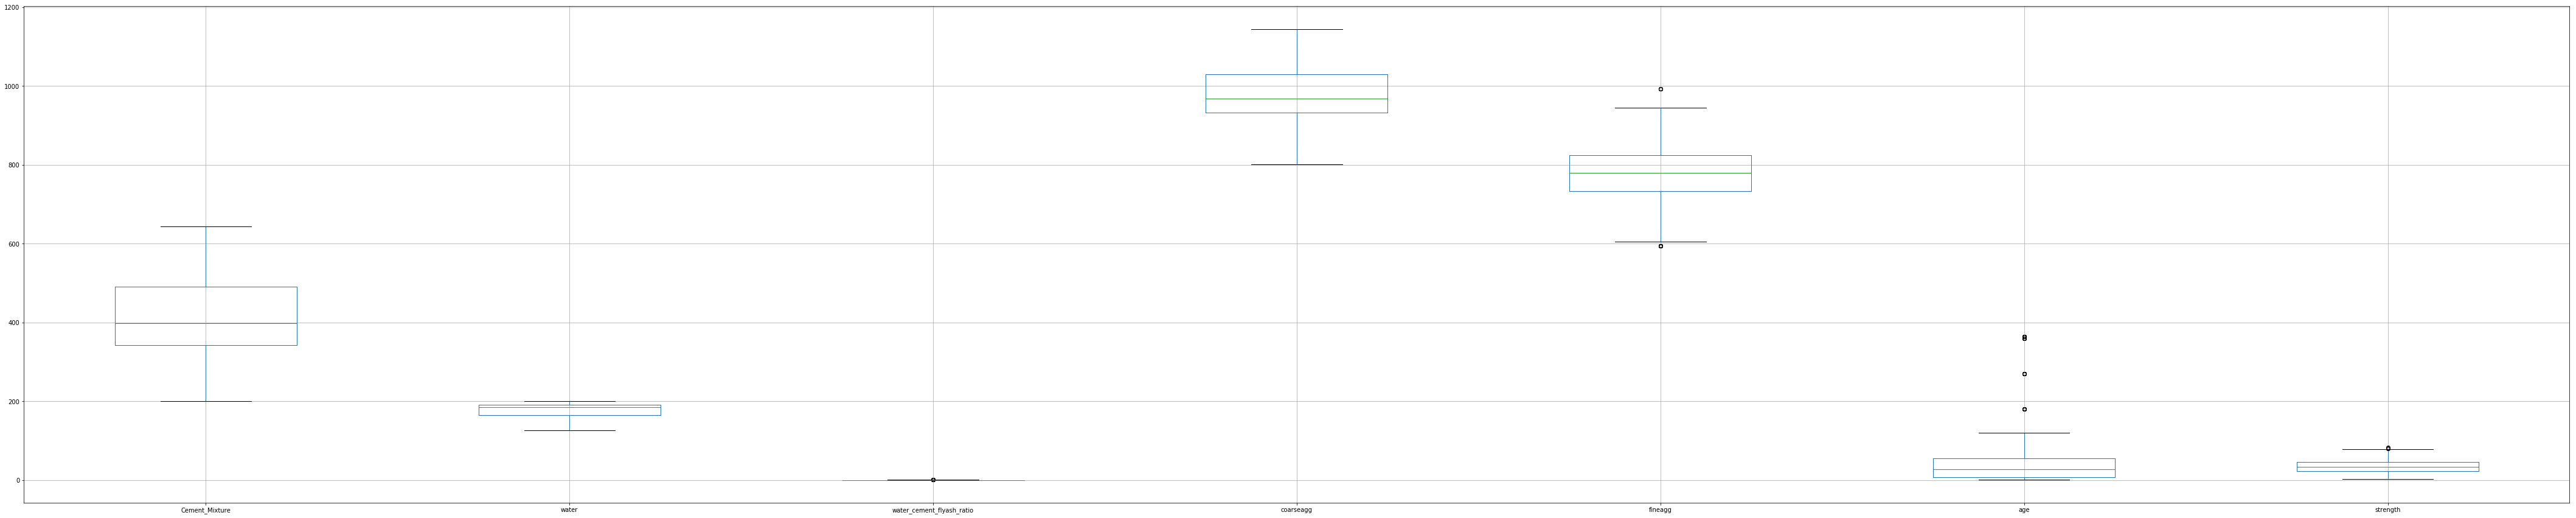

In [461]:
ClusterAnalysis_Combined_df.boxplot(figsize=(75,15))

In [462]:
ClusterAnalysis_Combined_df.corr()

,Cement_Mixture,water,water_cement_flyash_ratio,coarseagg,fineagg,age,strength
Cement_Mixture,1.000000,-0.307433,-0.920333,-0.398057,-0.433666,-0.064414,0.622278
water,-0.307433,1.000000,0.561595,-0.086845,-0.327285,0.152287,-0.402290
water_cement_flyash_ratio,-0.920333,0.561595,1.000000,0.276164,0.313740,0.093156,-0.640062
coarseagg,-0.398057,-0.086845,0.276164,1.000000,-0.179904,-0.003367,-0.165155
fineagg,-0.433666,-0.327285,0.313740,-0.179904,1.000000,-0.157598,-0.168119
age,-0.064414,0.152287,0.093156,-0.003367,-0.157598,1.000000,0.328703
strength,0.622278,-0.402290,-0.640062,-0.165155,-0.168119,0.328703,1.000000


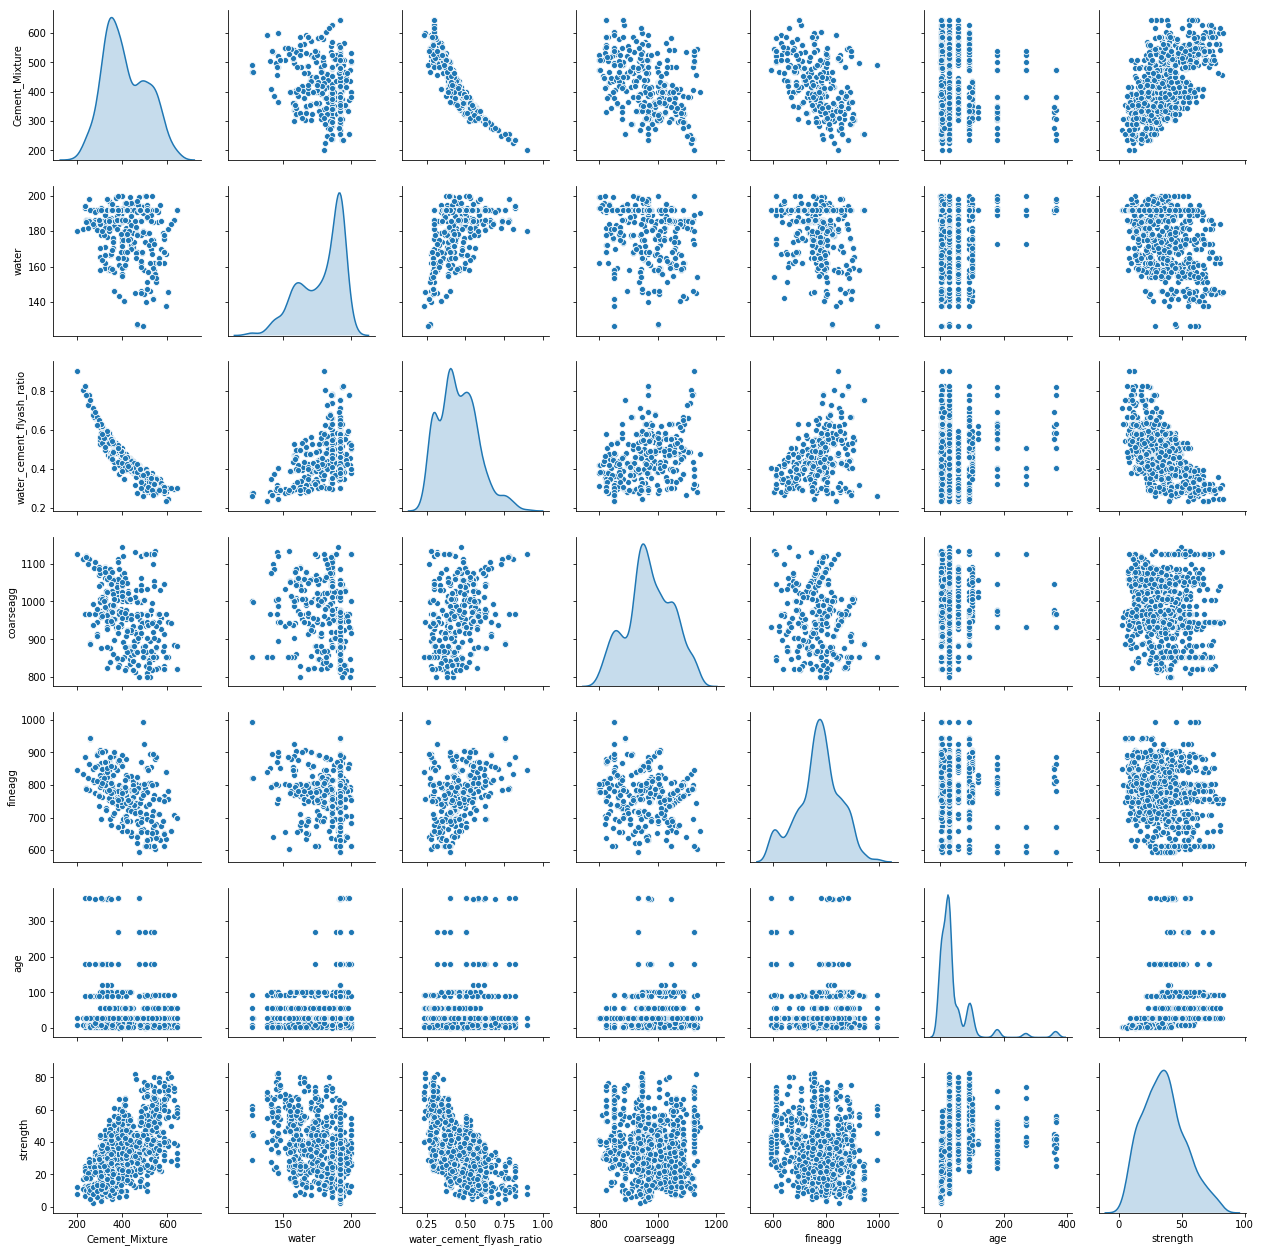

In [463]:
sns.pairplot(ClusterAnalysis_Combined_df,diag_kind='kde')

[  0.10241215  -0.11234579 -25.92908656   0.03149497   0.04488973
   0.11246943]
Accuracy Score using Linear Regression Model with Merged columns  is 0.6626287153734165
R2 score using Linear Regression Model with Merged columns is 0.6626287153734165


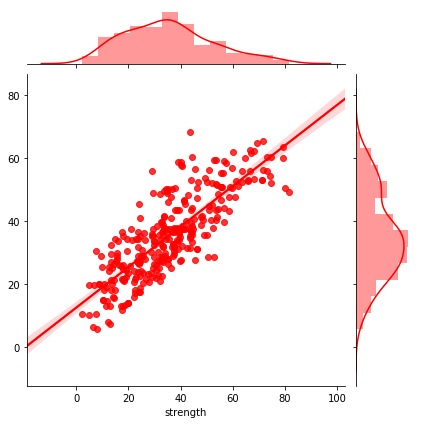

In [559]:
LR_X = ClusterAnalysis_Combined_df.loc[:,['Cement_Mixture','water','water_cement_flyash_ratio','coarseagg','fineagg','age']]
LR_y = ClusterAnalysis_Combined_df.loc[:,'strength']

LR_Xtrain, LR_Xtest, LR_ytrain, LR_ytest = train_test_split(LR_X,LR_y,test_size=0.3,random_state=2)

linearReg = LinearRegression()
linearReg.fit(LR_Xtrain,LR_ytrain)


LR_y_predict = linearReg.predict(LR_Xtest)
print(linearReg.coef_)

print("Accuracy Score using Linear Regression Model with Merged columns  is {}".format(linearReg.score(LR_Xtest,LR_ytest)))

print("R2 score using Linear Regression Model with Merged columns is {}".format(r2_score(LR_ytest,LR_y_predict)))

sns.jointplot(x=LR_ytest, y=LR_y_predict, kind="reg", color="r");

# Still more data points are away from the best fit line. DIfference now is most points are now leaning towards a higher range

# This can be seen from pairplot, most columns having multiple gaussians, the data is spread on the right side of the gaussian more

In [561]:
poly = PolynomialFeatures(interaction_only=False)

X_poly_final = poly.fit_transform(LR_X)
X_train_Poly, X_test_Poly, y_train_Poly, y_test_Poly = train_test_split(X_poly_final, LR_y, test_size=0.30, random_state=1)
poly_regressor = LinearRegression()
poly_regressor.fit(X_train_Poly, y_train_Poly)

ypredict_poly = poly_regressor.predict(X_test_Poly)

print("\nAccuracy Score in Training for Polynomial Regression model is {}".format(poly_regressor.score(X_train_Poly,y_train_Poly)))

print("\nAccuracy Score in Testing for Polynomial Regression model is {}".format(poly_regressor.score(X_test_Poly,y_test_Poly)))


Accuracy Score in Training for Polynomial Regression model is 0.7729742560882955

Accuracy Score in Testing for Polynomial Regression model is 0.7233313994134751


In [562]:
print(poly_regressor.coef_)

[ 1.84225027e-06 -2.00930544e+00  4.25840962e+00 -2.16293843e+03
 -2.47486023e-01  1.28734980e-01  6.82434386e-01  3.80506143e-04
  1.08460483e-03  4.25840927e+00  8.59877968e-04  8.65987850e-04
 -3.31437772e-04 -1.35052571e-02  4.17649174e+00 -3.43864865e-03
 -3.14257581e-03  1.41063564e-04 -9.95177224e+01  7.29276647e-01
  8.61008994e-01 -4.99115749e-01  1.13066710e-04  1.30299545e-05
 -2.15361219e-04 -1.83519163e-04  2.87042111e-04 -7.05864988e-04]


In [563]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train_Poly,y_train_Poly)

print("Training score using ridge penalty for a polynomial model is {}".format(ridge.score(X_train_Poly, y_train_Poly)))
print("Testing score using ridge penalty for a polynomial model is {}".format(ridge.score(X_test_Poly, y_test_Poly)))
print ("Ridge model:", (ridge.coef_))


Training score using ridge penalty for a polynomial model is 0.7718979776064705
Testing score using ridge penalty for a polynomial model is 0.7251824560784468
Ridge model: [ 0.00000000e+00  7.86088661e-02  1.49530063e+00 -3.08541343e-01
 -1.42012058e-01  1.19850879e-02  6.79901621e-01 -1.77934006e-04
 -1.64851123e-04  1.49530063e+00  2.36522928e-04  1.53548441e-04
 -3.10107114e-04 -4.77006231e-03  6.02982462e-01 -1.55503480e-03
 -3.34724044e-04  6.53213288e-05 -3.11752166e-01  1.58882346e-02
 -4.00985924e-02 -4.83050558e-01  1.31499411e-04  1.45896696e-04
 -2.17123193e-04 -6.09862238e-05  2.88819664e-04 -7.01796579e-04]


# Random Forest Regressor on the Newly Formed Dataframe:

In [466]:
ClusterAnalysis_Combined_df_scaled = ClusterAnalysis_Combined_df.apply(zscore)

RF_X = ClusterAnalysis_Combined_df_scaled.loc[:,['Cement_Mixture','water','water_cement_flyash_ratio','coarseagg','fineagg','age']]
RF_y = ClusterAnalysis_Combined_df_scaled.loc[:,'strength']

RF_Xtrain, RF_Xtest, RF_ytrain, RF_ytest = train_test_split(RF_X,RF_y,test_size=0.3,random_state=2)

RandomForst_regr = RandomForestRegressor(max_depth=10,max_features=4,random_state=0)
RandomForst_regr.fit(RF_Xtrain, RF_ytrain)
RandomForst_regr_predicted = RandomForst_regr.predict(RF_Xtest)

print("\n Training Accuracy Score using Random Forest with Merged data is {}".format(RandomForst_regr.score(RF_Xtrain,RF_ytrain)))

print("\n Testing Accuracy Score using Random Forest with Merged data is {}".format(RandomForst_regr.score(RF_Xtest,RF_ytest)))


 Training Accuracy Score using Random Forest with Merged data is 0.9572869990317695

 Testing Accuracy Score using Random Forest with Merged data is 0.868792189719781


C:\Users\srith\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [526]:
Cluster_backup = ClusterAnalysis_Combined_df_scaled[:]

clusters = KMeans(n_clusters=3, n_init = 10,random_state=1)
clusters.fit(Cluster_backup)
Predicted_Gaussians=clusters.predict(Cluster_backup)
Cluster_backup["GROUP"] = Predicted_Gaussians 
Cluster_backup

C:\Users\srith\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Cement_Mixture,water,water_cement_flyash_ratio,coarseagg,fineagg,age,strength,GROUP
0,-0.650447,0.856059,0.700891,-0.015169,-0.315888,-0.280390,-0.355143,0
1,-0.725457,-1.248765,0.010272,1.386229,0.279842,-0.501956,-0.736942,0
2,-0.672633,0.568754,0.621985,-0.206737,1.091635,-0.280390,-0.395238,0
3,-0.368370,0.856059,0.394955,-0.526872,-1.296284,-0.280390,0.599955,1
4,-0.713835,0.937254,0.806104,0.956809,-0.962824,-0.280390,-1.049324,0
5,-1.688955,0.856059,2.379369,-1.069432,2.138223,0.700829,-0.835684,0
6,0.022523,0.856059,0.035762,0.033687,-1.014030,-0.612739,-1.201326,1
7,-0.409573,0.637457,0.362373,0.712529,-0.200988,0.162741,0.048799,0
8,-1.255804,0.856059,1.543770,1.440228,-0.109818,-0.280390,-0.848251,0
9,0.804309,0.980975,-0.487584,-1.195429,-0.934099,-0.280390,-0.409002,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000205A13F5240>,
      dtype=object)

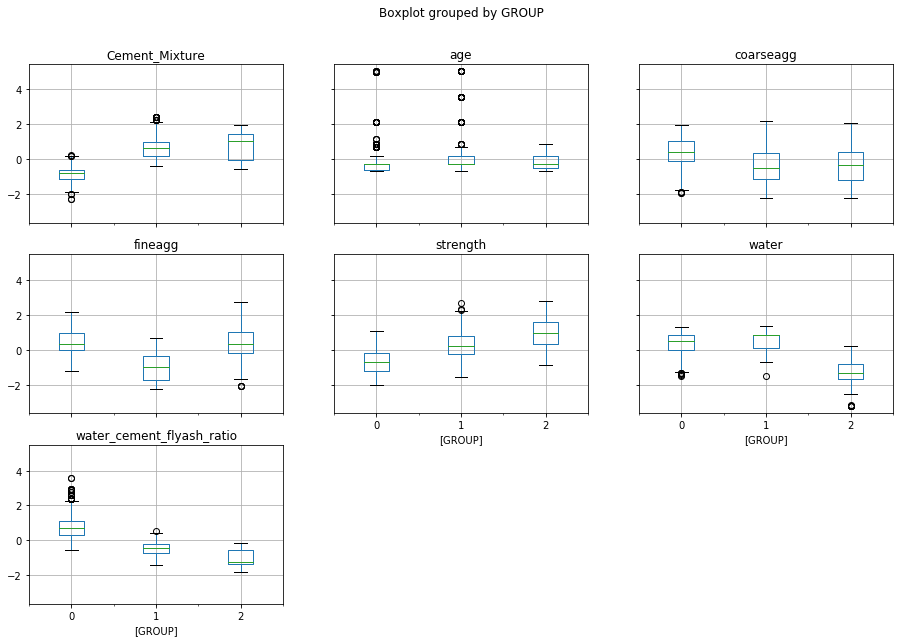

In [527]:
Cluster_backup.boxplot(by = 'GROUP',figsize=(15, 10))

In [528]:
# Let us break the data based on the concrete type. i.e concrete used for building, and concrete used for pavement and other works

BigBuildings= Cluster_backup[Cluster_backup['GROUP']==2]
MediumBuildings= Cluster_backup[concat_data1['GROUP']==1]
SmallBuildings = Cluster_backup[Cluster_backup['GROUP']==0]

In [535]:
BigBuildings_X = BigBuildings.loc[:,['Cement_Mixture','water','water_cement_flyash_ratio','coarseagg','fineagg','age']]
BigBuildings_y = BigBuildings.loc[:,'strength']

BigBuildings_Xtrain, BigBuildings_Xtest, BigBuildings_ytrain, BigBuildings_ytest = train_test_split(BigBuildings_X,BigBuildings_y,test_size=0.5,random_state=2)

RandomForst_regr_BigBuilding = RandomForestRegressor(max_depth=10,max_features=4,random_state=0)
RandomForst_regr_BigBuilding.fit(BigBuildings_Xtrain, BigBuildings_ytrain)
RandomForst_regr_BigBuilding_predicted = RandomForst_regr_BigBuilding.predict(BigBuildings_Xtest)

print("\n : Training Accuracy Score using Random Forest for Big Building is {}".format(RandomForst_regr_BigBuilding.score(BigBuildings_Xtrain,BigBuildings_ytrain)))

print("\n : Testing Accuracy Score using Random Forest with Big Building is {}".format(RandomForst_regr_BigBuilding.score(BigBuildings_Xtest,BigBuildings_ytest)))


 : Training Accuracy Score using Random Forest for Big Building is 0.9610985062285659

 : Testing Accuracy Score using Random Forest with Big Building is 0.7215390974047715


C:\Users\srith\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [549]:
MediumBuildings_X = MediumBuildings.loc[:,['Cement_Mixture','water','water_cement_flyash_ratio','coarseagg','fineagg','age']]
MediumBuildings_y = MediumBuildings.loc[:,'strength']

MediumBuildings_Xtrain, MediumBuildings_Xtest, MediumBuildings_ytrain, MediumBuildings_ytest = train_test_split(MediumBuildings_X,MediumBuildings_y,test_size=0.3,random_state=2)

RandomForst_regr_MediumBuilding = RandomForestRegressor(max_depth=9,max_features=3,random_state=0)
RandomForst_regr_MediumBuilding.fit(MediumBuildings_Xtrain, MediumBuildings_ytrain)
RandomForst_regr_MediumBuilding_predicted = RandomForst_regr_MediumBuilding.predict(MediumBuildings_Xtest)

print("\n : Training Accuracy Score using Random Forest for Medium Building is {}".format(RandomForst_regr_MediumBuilding.score(MediumBuildings_Xtrain,MediumBuildings_ytrain)))

print("\n : Testing Accuracy Score using Random Forest with Medium Building is {}".format(RandomForst_regr_MediumBuilding.score(MediumBuildings_Xtest,MediumBuildings_ytest)))


 : Training Accuracy Score using Random Forest for Medium Building is 0.9542463602371941

 : Testing Accuracy Score using Random Forest with Medium Building is 0.8233158866778274


C:\Users\srith\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [558]:
SmallBuildings_X = SmallBuildings.loc[:,['Cement_Mixture','water','water_cement_flyash_ratio','coarseagg','fineagg','age']]
SmallBuildings_y = SmallBuildings.loc[:,'strength']

SmallBuildings_Xtrain, SmallBuildings_Xtest, SmallBuildings_ytrain, SmallBuildings_ytest = train_test_split(SmallBuildings_X,SmallBuildings_y,test_size=0.3,random_state=2)

RandomForst_regr_SmallBuilding = RandomForestRegressor(max_depth=8,max_features=3,random_state=0)
RandomForst_regr_SmallBuilding.fit(SmallBuildings_Xtrain, SmallBuildings_ytrain)
RandomForst_regr_SmallBuilding_predicted = RandomForst_regr_SmallBuilding.predict(SmallBuildings_Xtest)

print("\n : Training Accuracy Score using Random Forest for Small Building is {}".format(RandomForst_regr_SmallBuilding.score(SmallBuildings_Xtrain,SmallBuildings_ytrain)))

print("\n : Testing Accuracy Score using Random Forest with Small Building is {}".format(RandomForst_regr_SmallBuilding.score(SmallBuildings_Xtest,SmallBuildings_ytest)))


 : Training Accuracy Score using Random Forest for Small Building is 0.9277590941788363

 : Testing Accuracy Score using Random Forest with Small Building is 0.7837179055155145


C:\Users\srith\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
# Clustering provides a better performance than a linear or polynomial model, but less than random forest ensembled model

In [579]:
kfold = KFold(n_splits=10,random_state=1)
RandomForst_regr = RandomForestRegressor(n_estimators=100,max_depth=10,max_features=3,random_state=0)
results = cross_val_score(RandomForst_regr,RF_X,RF_y,cv=kfold)
print(results)

mean = round(results.mean(),3)
std = round(results.std(),3)

print("\nThe model is expected to perform in the range of {} - {} at 95 percent confidence".format(mean - std, mean+std))

[0.82512022 0.90530253 0.91319077 0.87653327 0.85554955 0.91342482
 0.88932556 0.88142144 0.89846946 0.90792651]

The model is expected to perform in the range of 0.86 - 0.914 at 95 percent confidence


In [605]:
grid_params_RandomForest = {'n_estimators':(10,50,100),'max_depth':(6,7,8,9,10,11,12),'max_features':(3,4),'criterion':('mse','mae')}

In [606]:
RS_CV_RandomForest = RandomizedSearchCV(RandomForst_regr,grid_params_RandomForest,cv=10,random_state=1,error_score='raise')

In [607]:
RS_CV_RandomForest.fit(RF_Xtrain,RF_ytrain)

print(RS_CV_RandomForest.best_params_)

{'n_estimators': 100, 'max_features': 3, 'max_depth': 12, 'criterion': 'mse'}


In [610]:
RS_CV_RandomForest.score(RF_Xtest,RF_ytest)

0.8893832669285852